---
# Análisis de la Demanda Internacional
---



| Variables | Formato | Definición ||
| --- | --- | --- | --- |
|Código del producto        |  string | Código HS6 para productos|
|país                       |  string |país donde se realizo la exportanción|
|año                      |  string |periodo en años entre 2018 a 2022|
|País Importa desde el mundo|  entero  |valor importado por país|
|exportación real           |  entero  |valor de exportación de Colombia |
|potencial exportación      |  entero  |Valor importado por país|
|País exporta hacia el mundo|  entero  |valor exportado por los países|
|cadena productiva          |  string | segmento de los productos|
|iso3                       |  string | código internacional de países|
|continent                  |  string | continente|
|dist                       |  decimal| distancia en kilometros|
|acuerdo                    |  string |acuerdos comerciales|
|elasticidad                |  string |elasticidad por arancel de los productos|
|pib_per                    |  string |Variación del producto interno bruta per capita|
|ipc                        |  string |Variación del Indice del precio al Consumidor|
|product_export             |  string |sproducto exportado por Colombia|

## Instalacción de Librerías

In [ ]:
# Ignorar advertencias del código.
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Importar librerias generales
import pandas as pd
import numpy as np
from scipy.stats import randint as sp_randint
import io
import time
import sklearn.impute


from google.colab import files



#import modelos y métricas

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm


from sklearn.impute import KNNImputer
from sklearn.metrics import pairwise_distances

# manipulación y visualización

import seaborn as sns



import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline


from collections import Counter

import scipy
from pylab import rcParams


import plotly
import plotly.graph_objs as go
import plotly.express as px


plt.rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = 10, 5# Golden Mean


## Consulta de datos

In [ ]:
#Datasets en drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file = '/content/drive/MyDrive/project_procolombia/data1.csv'
file = '/content/drive/MyDrive/project_procolombia/data2.csv'

#file = '/content/drive/MyDrive/project_procolombia/Files/Resultados/results.csv'

In [ ]:
df = pd.read_csv(file, sep=',', encoding='utf-8')

In [ ]:
df['Código del producto']=df['Código del producto'].astype('object')
df['años']=df['años'].astype('object')

In [ ]:
df.head(2)

,Código del producto,país,años,Colombia exporta hacia País,País Importa desde el mundo,potencial sin explotar restante,exportación real,potencial exportación,Colombia importa desde País,País exporta hacia el mundo,...,adv,positive,arancel,elasticidad,pib_per,ipc,%export,%potencial,product_export,prediction
0,10121,Afganistan,2018,0,15561,15561,0,15561,0,0,...,NaN,NaN,sin info,sin info,negativa,positiva,0.0,0.485644,no,no
1,10121,Afganistan,2019,0,2771,2771,0,2771,0,0,...,NaN,NaN,sin info,sin info,positiva,positiva,0.0,0.485644,no,no


Selección de variables de manera preliminar.

In [ ]:
df1=df.drop(['Colombia exporta hacia País','descripción','Colombia importa desde País','cnum','iso2',
                'saldo_comercial','saldo_comercial_p','desemp_logist','ipp','trasnpor_mar','arancel%','country','gast_consum','col_export','pib_per%','poblacion',
             'ipc%','tipo_cambio','positive','adv','area','SubPartida','potencial sin explotar restante','arancel','Sector','Subsector',
             '%export','%potencial','prediction'], axis=1)

In [ ]:
df1.head(2)

,Código del producto,país,años,País Importa desde el mundo,exportación real,potencial exportación,País exporta hacia el mundo,Cadena productiva,iso3,continent,dist,acuerdo,elasticidad,pib_per,ipc,product_export
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,14288.69,no,sin info,negativa,positiva,no
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,14288.69,no,sin info,positiva,positiva,no


In [ ]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181669 entries, 0 to 3181668
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Código del producto          object 
 1   país                         object 
 2   años                         object 
 3   País Importa desde el mundo  int64  
 4   exportación real             int64  
 5   potencial exportación        int64  
 6   País exporta hacia el mundo  int64  
 7   Cadena productiva            object 
 8   iso3                         object 
 9   continent                    object 
 10  dist                         float64
 11  acuerdo                      object 
 12  elasticidad                  object 
 13  pib_per                      object 
 14  ipc                          object 
 15  product_export               object 
dtypes: float64(1), int64(4), object(11)
memory usage: 388.4+ MB


## **Calidad de datos**

In [ ]:
# Identificamos el número de missing values en cada columna
# https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1['país'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(44)

,Total,Percent
dist,55796,0.017537
Código del producto,0,0.000000
país,0,0.000000
años,0,0.000000
País Importa desde el mundo,0,0.000000
exportación real,0,0.000000
potencial exportación,0,0.000000
País exporta hacia el mundo,0,0.000000
Cadena productiva,0,0.000000
iso3,0,0.000000


Se presenta datos faltantes en la variable distancia (dist).

## Preparación de datos

Se renombran variables.

In [ ]:
df1 = df1.rename(columns={'exportación real': 'exportación_real'})
df1 = df1.rename(columns={'País exporta hacia el mundo': 'País_exporta_mundo'})
df1 = df1.rename(columns={'País Importa desde el mundo': 'País_importa_mundo'})
df1 = df1.rename(columns={'Código del producto': 'producto'})
df1 = df1.rename(columns={'Cadena productiva': 'cadena'})

Se completa datos faltantes de la variable distancia, se evidencia que tres países con código ISO = ['CUW', 'MNE', 'SRB'] no presentan la distancia. Se valida en [Distancias entre páises](https://www.geodatos.net/distancias/paises#google_vignette) para completar esta información.


In [ ]:
# Reemplazar NaN y valores infinitos con cero
df1['dist'] = df1['dist'].fillna(0)

# Convertir la columna a tipo entero
df1['dist'] = df1['dist'].astype(int)

In [ ]:
# Lista de nombres de los países
#paises = ['CUW', 'MNE', 'SRB']

# Valores de reemplazo para cada país
valores_reemplazo = {
    'CUW': 1023.0,
    'SRB': 10084.0,
    'MNE': 9969.0}

# Se reemplaza ceros en la columna "dist" según el país
def reemplazar_dist(row):
    iso3 = row['iso3']
    if iso3 in valores_reemplazo:
        if row['dist'] == 0:
            return valores_reemplazo[iso3]
    return row['dist']

# Se aplica la función a cada fila del dataFrame
df1['dist'] = df1.apply(reemplazar_dist, axis=1)

In [ ]:
#  Se valida la completitud de información de las distancias entre países.
agr = df1[['iso3','dist']].groupby('iso3').count()
agr = agr.reset_index()

In [ ]:
## Se genera copia de dataframe por los cambios realizados.
dft2=df1

Se cambia el formato de la variable años y se genera variables dummy.

In [ ]:
# Se cambia formato de la variable años a string
dft2['años'] = dft2['años'].astype(str)

In [ ]:
#Se valida los productos exportados entre colombia y demás países
dft2['product_export'].value_counts(dropna=False)

product_export
no    2956403
si     225266
Name: count, dtype: int64

In [ ]:
# Crea la variable dummy para el páis que exporta a demás países del mundo.
dft2['pais_export'] = dft2['País_exporta_mundo'].apply(lambda x: 'no' if x == 0 else 'si')

In [ ]:
# Se valida la variable creada

dft2['pais_export'].value_counts(dropna=False)

pais_export
si    1812174
no    1369495
Name: count, dtype: int64

In [ ]:
# se valida la variable acuerdos comerciales
dft2['acuerdo'].value_counts(dropna=False)

acuerdo
no    1937910
si    1243759
Name: count, dtype: int64

In [ ]:
# Se valida los cambios realizados en la estructura de los datos
dft2.head(2)

,producto,país,años,País_importa_mundo,exportación_real,potencial exportación,País_exporta_mundo,cadena,iso3,continent,dist,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,positiva,no,no
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,positiva,positiva,no,no


A continuación, se generan los indicadores que nos permiten inferir con respecto a la demanda internacional presentada por Colombia.

### Índice penetración de mercado

 PMI (índice penetración de mercado) es una medida de cuánto están utilizando los clientes (países) un producto o servicio en comparación con el mercado total estimado para ese producto o servicio.

In [ ]:
# Se filtra los datos donde el valor exportado sea mayor a cero por el reportante
# y el valor importado mayor a cero por los países que importan el producto

dft2_filtrado1 = dft2[(dft2['exportación_real'] > 0)]
dft2_filtrado2 = dft2[(dft2['País_importa_mundo'] > 0)]

# Se calcula el número de países únicos a los que el reportante exporta cierto producto
num_paises_exporta = dft2_filtrado1.groupby(['producto', 'años'])['país'].nunique()


# Se calcula el número de países únicos que importan el producto en ese año
num_paises_importan = dft2_filtrado2.groupby(['producto', 'años'])['País_importa_mundo'].count()


# Se calcula el índice de penetración en el mercado de exportación
pmi = num_paises_exporta / num_paises_importan


# Se crea un DataFrame con los resultados
dft2_resultado = pd.DataFrame(pmi, columns=['pmi'])


In [ ]:
# se valida resultados
print(num_paises_exporta)

producto  años
10121     2018     5
          2019     6
          2020     6
          2021     5
          2022     6
                  ..
970300    2020    13
          2021    17
970310    2022     1
970390    2022    13
970500    2020     2
Name: país, Length: 16568, dtype: int64


In [ ]:
# se valida resultados
print(num_paises_importan)

producto  años
10121     2018    103
          2019    109
          2020    103
          2021    110
          2022    118
                 ... 
970600    2019     97
          2020     91
          2021     97
          2022     21
970690    2022     73
Name: País_importa_mundo, Length: 24425, dtype: int64


In [ ]:
# se valida resultados
dft2_resultado.head(2)

pmi
producto años          
10121    2018  0.048544
         2019  0.055046

In [ ]:
# se agrega la variable PMI
dft3 = pd.merge(dft2, dft2_resultado, how='left', on=['producto', 'años'])

In [ ]:
# se valida dataframe
dft3.head(2)

,producto,país,años,País_importa_mundo,exportación_real,potencial exportación,País_exporta_mundo,cadena,iso3,continent,dist,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export,pmi
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,positiva,no,no,0.048544
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,positiva,positiva,no,no,0.055046


In [ ]:
# Se valida datos faltantes
dft3['pmi'].value_counts(dropna=False)

pmi
NaN         786517
0.030303     11616
0.018182     11440
0.018519     10746
0.024096      9960
             ...  
0.131148        61
0.098361        61
0.114754        61
0.087719        57
0.215686        51
Name: count, Length: 1507, dtype: int64

In [ ]:
# Se reemplaza NaN y valores infinitos con cero
dft3['pmi'] = dft3['pmi'].fillna(0)

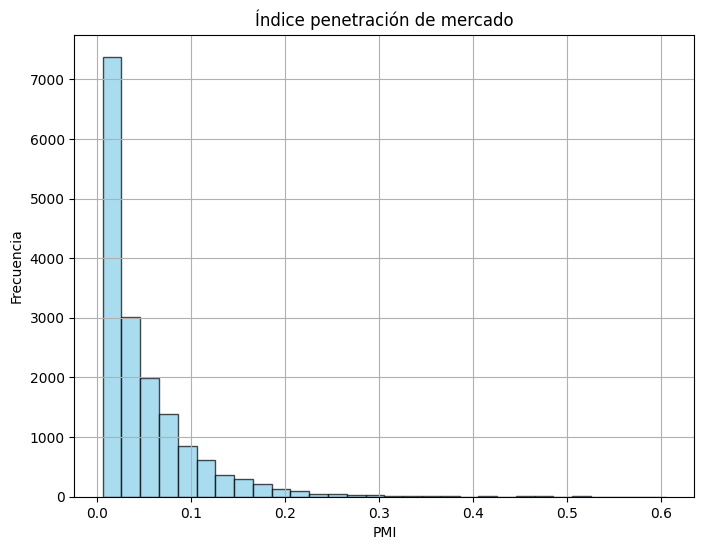

Cuantiles:
0.00    0.005882
0.25    0.013793
0.50    0.030769
0.75    0.066265
1.00    0.605769
dtype: float64


In [ ]:

# Graficar la distribución de la variable
plt.figure(figsize=(8, 6))
plt.hist(pmi, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Índice penetración de mercado')
plt.xlabel('PMI')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular los cuantiles
cuantiles = pmi.quantile([0, 0.25, 0.5, 0.75, 1])

# Imprimir los cuantiles
print("Cuantiles:")
print(cuantiles)

In [ ]:

# Se define el cuantil para dividir en dos grupos
cuantil_medio = 0.030769  # Este es el cuantil 50%

# Función para categorizar el índice de penetración en dos grupos: alto y bajo
def categorizar_indice(indice):
    if indice <= cuantil_medio:
        return 'bajo'
    else:
        return 'alto'

# Aplicar la función a cada valor de índice_penetracion y crear la variable dummy
dft3['pmi'] = dft3['pmi'].apply(categorizar_indice)



In [ ]:
# se valida la variable categorizada
dft3['pmi'].value_counts(dropna=False)

pmi
bajo    1923562
alto    1258107
Name: count, dtype: int64

In [ ]:
# se valida el dataframe
dft3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181669 entries, 0 to 3181668
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   producto               object 
 1   país                   object 
 2   años                   object 
 3   País_importa_mundo     int64  
 4   exportación_real       int64  
 5   potencial exportación  int64  
 6   País_exporta_mundo     int64  
 7   cadena                 object 
 8   iso3                   object 
 9   continent              object 
 10  dist                   float64
 11  acuerdo                object 
 12  elasticidad            object 
 13  pib_per                object 
 14  ipc                    object 
 15  product_export         object 
 16  pais_export            object 
 17  pmi                    object 
dtypes: float64(1), int64(4), object(13)
memory usage: 436.9+ MB


### Índice de ventaja comparativa revelada

El Índice de ventaja comparativa revelada (RCA) es igual a la proporción de las exportaciones del país, ciudad o región de un determinado producto, dividido por la proporción de exportaciones mundiales de este producto.

Valores de RCA > 1 indica que un territorio es especialista en determinado producto porque exporta más de lo esperado.

In [ ]:
# Se calcula las exportaciones totales de Colombia para cada año y producto
colombia_exports = dft3.groupby(['años', 'producto'])['exportación_real'].sum()

In [ ]:
# Se calcula las exportaciones totales de todos los países para cada año y producto
world_exports = dft3.groupby(['años', 'producto'])['País_exporta_mundo'].sum()

In [ ]:
# Se calcula la participación de Colombia en las exportaciones mundiales para cada producto y año
colombia_share = colombia_exports / world_exports

In [ ]:
# Se calcula la participación de Colombia en las exportaciones mundiales promedio para cada años
average_colombia_share = colombia_exports.groupby('años').sum() / world_exports.groupby('años').sum()

In [ ]:
# Se calcula la participación de cada país en las exportaciones mundiales promedio para cada años
average_world_share = world_exports.groupby('años').sum() / world_exports.groupby('años').sum()

In [ ]:
# Se calcular el RCA para cada producto y año
RCA = colombia_share / average_colombia_share / (average_world_share / 1)

In [ ]:
RCA

años  producto
2018  10121       0.634601
      10129       0.035330
      10130       0.211623
      10190       0.000000
      10221       0.000000
                    ...   
2022  970400      0.000000
      970500      0.000000
      970539      0.000000
      970600      0.000000
      970690      0.000000
Length: 24425, dtype: float64

In [ ]:
# Se reinicia los índices para ambos DataFrames
RCA_df = RCA.to_frame()

In [ ]:
# Se fusiona los DataFrames en función de las columnas 'año' y 'producto'
dft3 = pd.merge(dft3, RCA_df, on=['años', 'producto'], how='left')

In [ ]:
# Se renombra variable
dft3 = dft3.rename(columns={0: 'rca'})

In [ ]:
# Se crea la variable dummy
dft3['rca_a'] = (dft3['rca'] > 1).astype(int)

# Se muestra el resultado
print(dft3['rca_a'])

0          0
1          0
2          0
3          0
4          0
          ..
3181664    0
3181665    0
3181666    0
3181667    0
3181668    0
Name: rca_a, Length: 3181669, dtype: int64


In [ ]:
dft3.head()

,producto,país,años,País_importa_mundo,exportación_real,potencial exportación,País_exporta_mundo,cadena,iso3,continent,dist,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export,pmi,rca,rca_a
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,positiva,no,no,alto,0.634601,0
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,positiva,positiva,no,no,alto,0.238061,0
2,10121,Afganistan,2021,34,0,34,4,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,sin info,no,si,alto,0.351576,0
3,10121,Afganistan,2022,13175,0,13175,8,Agroalimentos,AFG,Asia,14288.0,no,sin info,sin info,sin info,no,si,alto,0.223170,0
4,10129,Afganistan,2021,8,0,8,11,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,sin info,no,si,bajo,0.078284,0


In [ ]:
# se valida variable
dft3['rca_a'].value_counts(dropna=False)

rca_a
0    2768461
1     413208
Name: count, dtype: int64

In [ ]:
# Se define el cuantil para dividir en dos grupos

#cuantil_medio = 0.030769  # Este es el cuantil 50%

# Función para categorizar el índice de penetración en dos grupos: alto y bajo
def categorizar_rca_a(rca_a):
    if rca_a <= 0:
        return 'bajo'
    else:
        return 'alto'

# Se aplica la función a cada valor de índice_penetracion y se crea la variable dummy
dft3['rca_a'] = dft3['rca_a'].apply(categorizar_rca_a)

In [ ]:
# se valida variable
dft3['rca_a'].value_counts(dropna=False)

rca_a
bajo    2768461
alto     413208
Name: count, dtype: int64

In [ ]:
# se valida variable en dataframe
dft3.head(2)

,producto,país,años,País_importa_mundo,exportación_real,potencial exportación,País_exporta_mundo,cadena,iso3,continent,dist,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export,pmi,rca,rca_a
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,negativa,positiva,no,no,alto,0.634601,bajo
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,14288.0,no,sin info,positiva,positiva,no,no,alto,0.238061,bajo


### Factor distancia


Se realiza la categorización de la variable distancia entre tres niveles (larga, mediana, corta)

In [ ]:
dft3['dist']

0          14288.0
1          14288.0
2          14288.0
3          14288.0
4          14288.0
            ...   
3181664    11880.0
3181665    11880.0
3181666    11880.0
3181667    11880.0
3181668    11880.0
Name: dist, Length: 3181669, dtype: float64

Se valida la distribución de la variable distancia

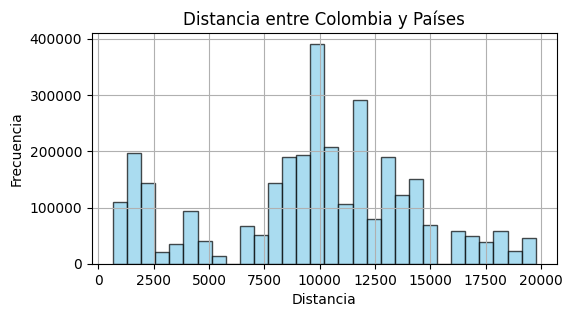

Cuantiles:
0.00      662.0
0.25     7847.0
0.50    10083.0
0.75    12766.0
1.00    19772.0
Name: dist, dtype: float64


In [ ]:
# Graficar la distribución de la variable
plt.figure(figsize=(6, 3))
plt.hist(dft3['dist'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distancia entre Colombia y Países')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular los cuantiles
cuantiles = dft3['dist'].quantile([0, 0.25, 0.5, 0.75, 1])

# Imprimir los cuantiles
print("Cuantiles:")
print(cuantiles)

In [ ]:
import pandas as pd

# Se define los límites de las categorías según los cuantiles dados
bin_edges = [0, 7847, 10083, 20000]  # límites de los cuantiles para 'Corta', 'Mediana' y 'Larga'
bin_names = ['Corta', 'Mediana', 'Larga']  # nombres de las categorías

# Se utiliza pd.cut() para categorizar la distancia desde Colombia a otros países
dft3['categoria_distancia'] = pd.cut(dft3['dist'], bins=bin_edges, labels=bin_names, right=False)

# Se muestra el DataFrame con la nueva columna de categoría de distancia
dft3.head(2)


,producto,país,años,País_importa_mundo,exportación_real,potencial exportación,País_exporta_mundo,cadena,iso3,continent,...,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export,pmi,rca,rca_a,categoria_distancia
0,10121,Afganistan,2018,15561,0,15561,0,Agroalimentos,AFG,Asia,...,no,sin info,negativa,positiva,no,no,alto,0.634601,bajo,Larga
1,10121,Afganistan,2019,2771,0,2771,0,Agroalimentos,AFG,Asia,...,no,sin info,positiva,positiva,no,no,alto,0.238061,bajo,Larga


In [ ]:
# Se valida variable
dft3['categoria_distancia'].value_counts(dropna=False)

categoria_distancia
Larga      1591453
Mediana     796053
Corta       794163
Name: count, dtype: int64

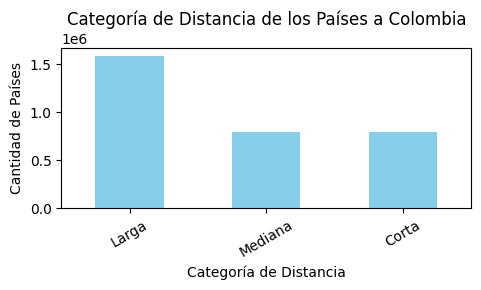

In [ ]:
import matplotlib.pyplot as plt


# Se calcula el recuento de cada categoría de distancia
categoria_counts = dft3['categoria_distancia'].value_counts()

# gráfica de barras
plt.figure(figsize=(5, 3))
categoria_counts.plot(kind='bar', color='skyblue')

# títulos y etiquetas
plt.title('Categoría de Distancia de los Países a Colombia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Países')

# gráfica
plt.xticks(rotation=30)  # etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # diseño para evitar que se corten las etiquetas
plt.show()


Se valida las categorias de las distancias dadas de acuerdo con el país y se evidencia concordancia de acuerdo a la ubicación del continente.

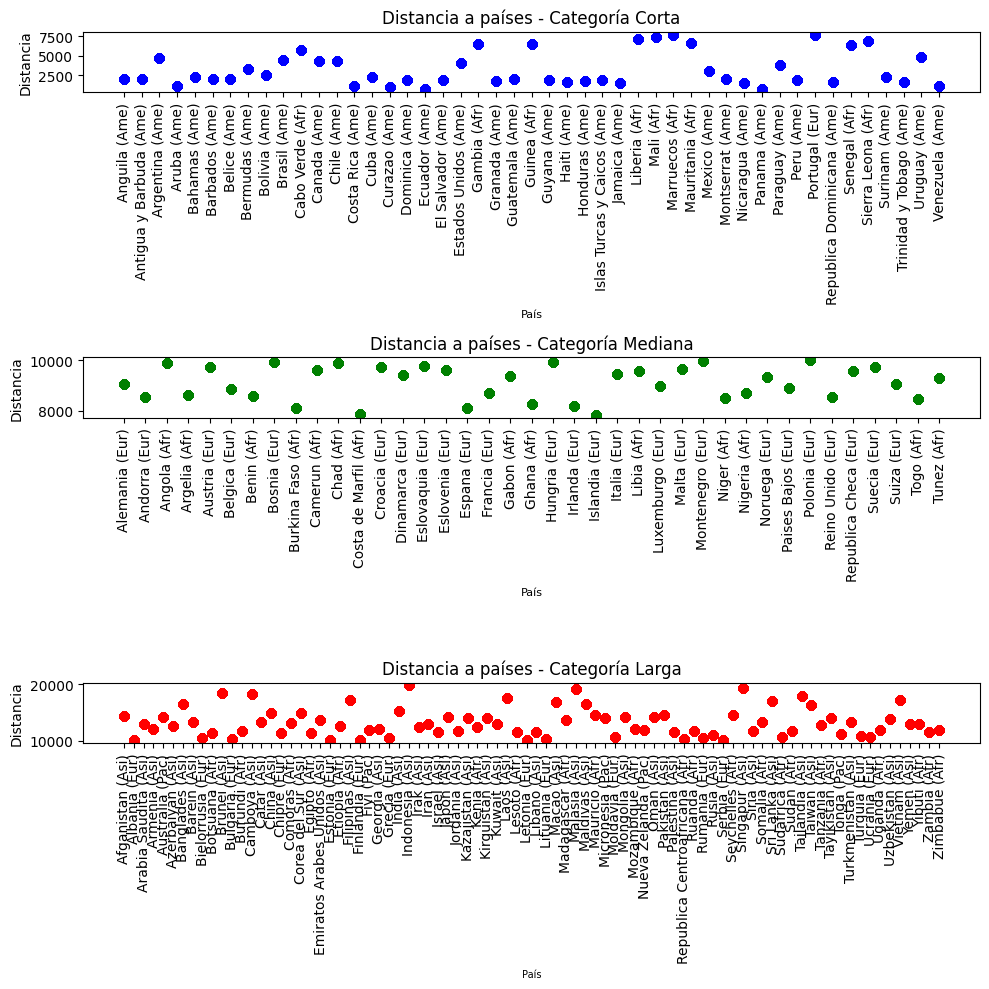

In [ ]:
# se recorta la variable continente
dft3['continente_abr'] = dft3['continent'].str[:3]

# una nueva columna que concatene país y continente
dft3['pais_continente'] = dft3['país'] + ' (' + dft3['continente_abr'] + ')'

# subgráficos
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# gráfica para la categoría "Corta"
dft3_corta = dft3[dft3['categoria_distancia'] == 'Corta']
axs[0].scatter(dft3_corta['pais_continente'], dft3_corta['dist'], color='blue')
axs[0].set_title('Distancia a países - Categoría Corta')
axs[0].set_xlabel('País', fontsize=8)
axs[0].set_ylabel('Distancia')
axs[0].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x

# gráfica para la categoría "Mediana"
dft3_mediana = dft3[dft3['categoria_distancia'] == 'Mediana']
axs[1].scatter(dft3_mediana['pais_continente'], dft3_mediana['dist'], color='green')
axs[1].set_title('Distancia a países - Categoría Mediana')
axs[1].set_xlabel('País', fontsize=8)
axs[1].set_ylabel('Distancia')
axs[1].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x

# gráfica para la categoría "Larga"
dft3_larga = dft3[dft3['categoria_distancia'] == 'Larga']
axs[2].scatter(dft3_larga['pais_continente'], dft3_larga['dist'], color='red')
axs[2].set_title('Distancia a países - Categoría Larga')
axs[2].set_xlabel('País', fontsize=7)
axs[2].set_ylabel('Distancia')
axs[2].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x

# diseño de los subgráficos
plt.tight_layout()

# gráficas
plt.show()


## Análisis de datos



En este apartado se realiza un analisis exploratorio de los datos para validar las distribuciones de cada una de ellas. S eexcluye alguna de ellas debido a que no se tendrán en cuenta para el objetivo del estudio.

In [ ]:
dft4=dft3.drop(['País_importa_mundo','País_exporta_mundo','dist','rca','pais_continente','continente_abr','iso3','product_export','pais_export'], axis=1)

In [ ]:
categorical_vars = dft4.describe(include=["object","category"]).columns
continuous_vars = dft4.describe().columns

In [ ]:
print('continuous_vars:',continuous_vars)
print('categorical_vars:',categorical_vars)

continuous_vars: Index(['exportación_real', 'potencial exportación'], dtype='object')
categorical_vars: Index(['producto', 'país', 'años', 'cadena', 'continent', 'acuerdo',
       'elasticidad', 'pib_per', 'ipc', 'pmi', 'rca_a', 'categoria_distancia'],
      dtype='object')


### Variables Cuantitativas

In [ ]:
dft4[continuous_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
exportación_real,3181669.0,25.991509,2150.460768,0.0,0.0,0.0,0.0,1682811.0
potencial exportación,3181669.0,24853.465928,428605.011581,1.0,51.0,496.0,4348.0,205091244.0


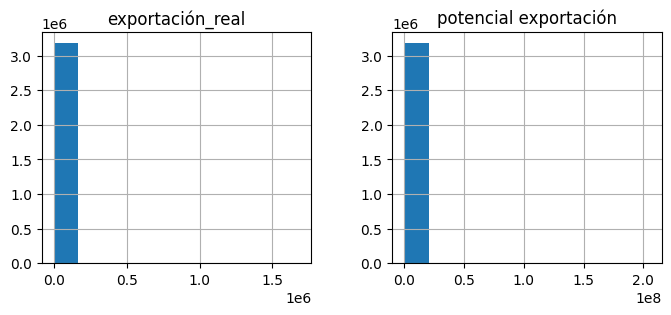

In [ ]:
# gráfico de barras de frecuencias relativas  #https://matplotlib.org/stable/tutorials/pyplot.html

_ = dft4.hist(column=continuous_vars, figsize=(8,3))


In [ ]:

# Pivotear la tabla según el año y el valor sea lo exportado
pivot_table = pd.pivot_table(dft4, values='exportación_real', index='país', columns='años', aggfunc='sum')

# Agregar una columna que sume lo exportado por todos los años
pivot_table['total_exportado'] = pivot_table.sum(axis=1)

# Tabla resultante
print(pivot_table)

años            2018      2019      2020      2021      2022  total_exportado
país                                                                         
Afganistan       0.0       6.0      49.0       4.0       0.0             59.0
Albania        732.0     694.0     868.0     290.0      13.0           2597.0
Alemania    391934.0  422222.0  391063.0  462814.0  514264.0        2182297.0
Andorra         11.0       0.0       0.0       0.0       0.0             11.0
Angola        1006.0    2544.0     872.0    2222.0    4837.0          11481.0
...              ...       ...       ...       ...       ...              ...
Vietnam      37164.0   29340.0   16856.0   19338.0   22996.0         125694.0
Yemen         1327.0    1163.0    1282.0     257.0     657.0           4686.0
Yibuti         492.0    2047.0     611.0    2500.0    1050.0           6700.0
Zambia        1391.0     307.0     121.0       0.0     344.0           2163.0
Zimbabue       117.0       2.0       5.0      51.0       4.0    

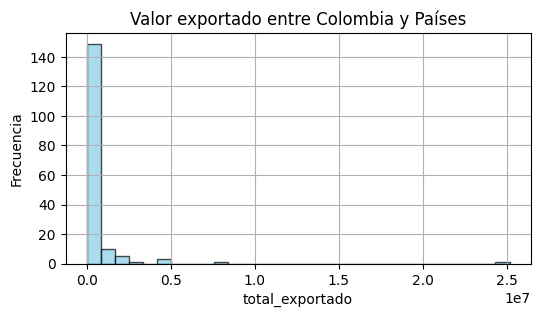

Cuantiles:
0.00           0.00
0.25        1540.25
0.50       11480.00
0.75      152647.75
1.00    25161954.00
Name: total_exportado, dtype: float64


In [ ]:
# Grafica la distribución de la variable
plt.figure(figsize=(6, 3))
plt.hist(pivot_table['total_exportado'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Valor exportado entre Colombia y Países')
plt.xlabel('total_exportado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcula los cuantiles
cuantiles = pivot_table['total_exportado'].quantile([0, 0.25, 0.5, 0.75, 1])

# Cuantiles
print("Cuantiles:")
print(cuantiles)

In [ ]:
# Pivotear la tabla según el año y el valor sea lo exportado
pivot_table = pd.pivot_table(dft4, values='exportación_real', index='producto', columns='años', aggfunc='sum')

# Agregar una columna que sume lo exportado por todos los años
pivot_table['total_exportado'] = pivot_table.sum(axis=1)

# Mostrar la tabla resultante
print(pivot_table)

años        2018   2019   2020   2021   2022  total_exportado
producto                                                     
10121     1033.0  372.0  323.0  570.0  390.0           2688.0
10129       44.0  126.0   89.0  102.0  277.0            638.0
10130        1.0    4.0    0.0    0.0   10.0             15.0
10190        0.0    0.0    7.0    0.0    4.0             11.0
10221        0.0    0.0    0.0    0.0    0.0              0.0
...          ...    ...    ...    ...    ...              ...
970400       0.0    0.0    0.0    0.0    0.0              0.0
970500       0.0    0.0  123.0    0.0    0.0            123.0
970539       NaN    NaN    NaN    NaN    0.0              0.0
970600       0.0    0.0    0.0    0.0    0.0              0.0
970690       NaN    NaN    NaN    NaN    0.0              0.0

[5085 rows x 6 columns]


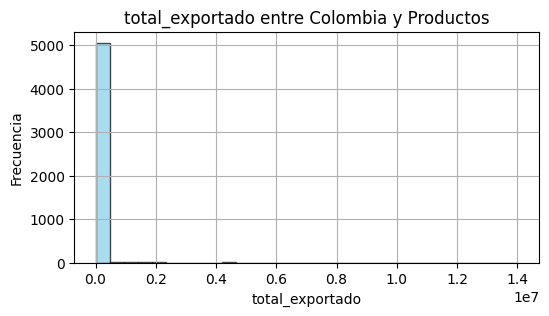

Cuantiles:
0.00           0.0
0.25           7.0
0.50         178.0
0.75        1892.0
1.00    14032166.0
Name: total_exportado, dtype: float64


In [ ]:
# Graficar la distribución de la variable
plt.figure(figsize=(6, 3))
plt.hist(pivot_table['total_exportado'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('total_exportado entre Colombia y Productos')
plt.xlabel('total_exportado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular los cuantiles
cuantiles = pivot_table['total_exportado'].quantile([0, 0.25, 0.5, 0.75, 1])

# Imprimir los cuantiles
print("Cuantiles:")
print(cuantiles)

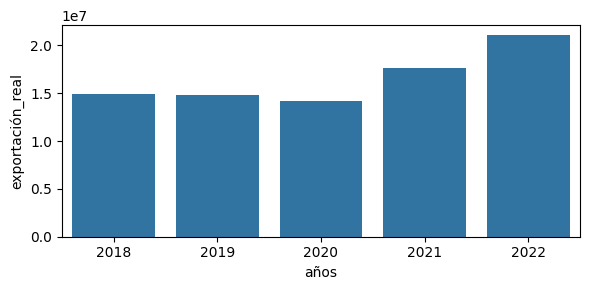

In [ ]:
agr = dft4[['exportación_real','años']].groupby('años').sum()
agr = agr.reset_index()

#https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.figure(figsize=(6,3))
sns.barplot(x='años', y='exportación_real', data=agr)
plt.tight_layout()

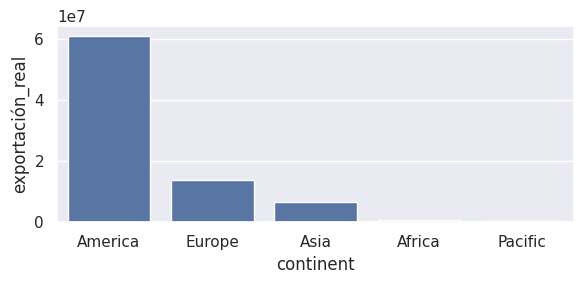

In [ ]:

agr = dft4[['exportación_real','continent']].groupby('continent').sum()

agr = agr.sort_values('exportación_real',ascending=False).reset_index(drop=False)
#agr = agr.reset_index()

#https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.figure(figsize=(6,3))
sns.barplot(x='continent', y='exportación_real', data=agr)
plt.tight_layout()

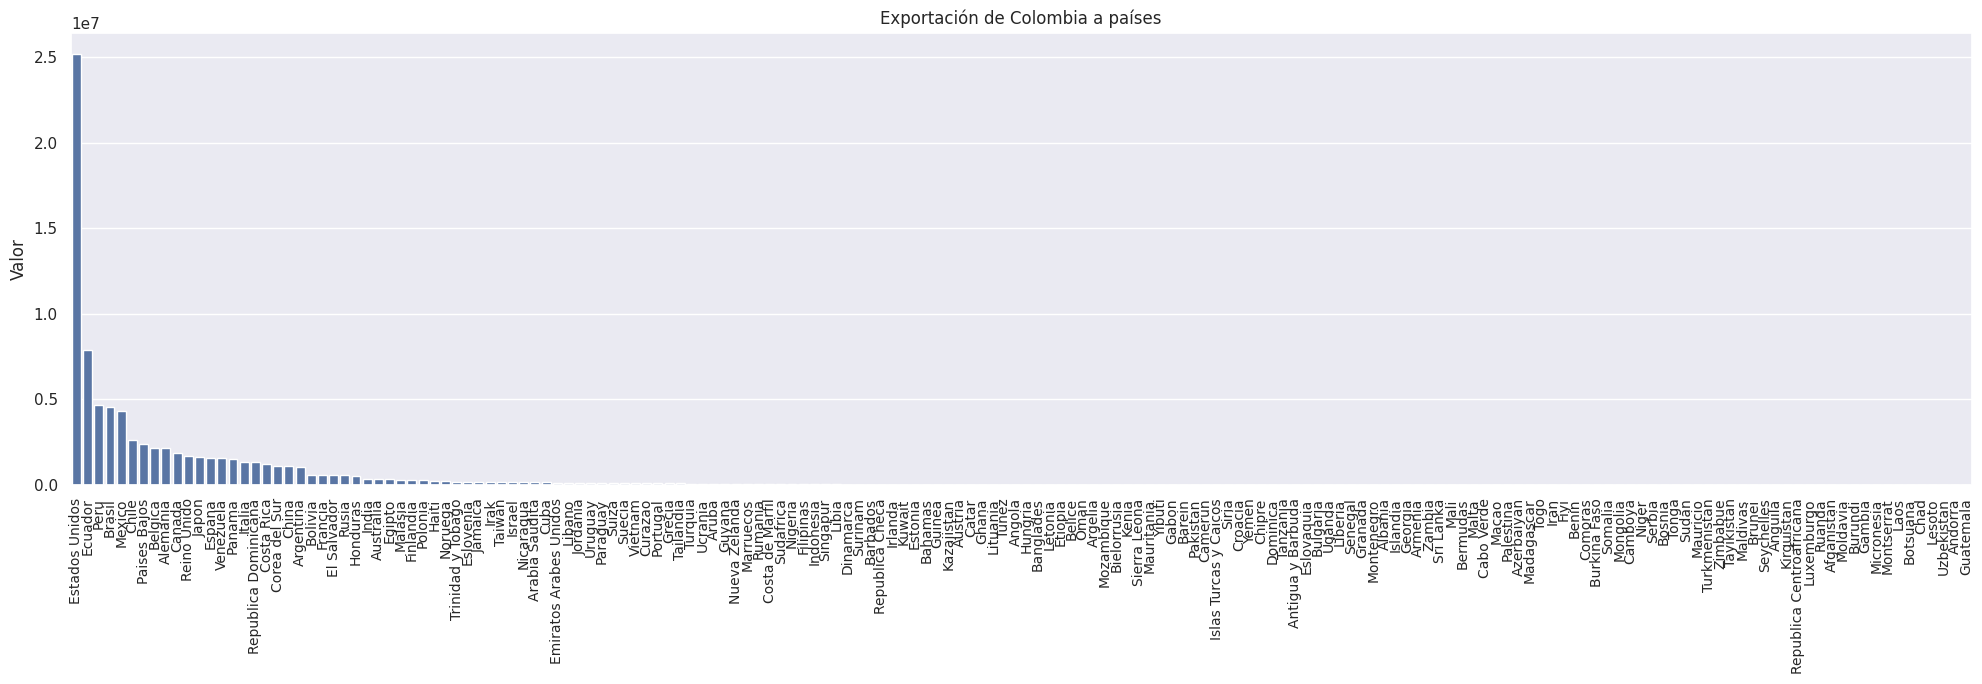

In [ ]:
agr = dft4[['exportación_real','país']].groupby('país').sum()

agr = agr.sort_values('exportación_real',ascending=False).reset_index(drop=False)
#agr = agr.reset_index()

#https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=(20,7))
sns.barplot(x='país', y='exportación_real', data=agr)
plt.title("Exportación de Colombia a países")
plt.xlabel('', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Valor")
plt.tight_layout()

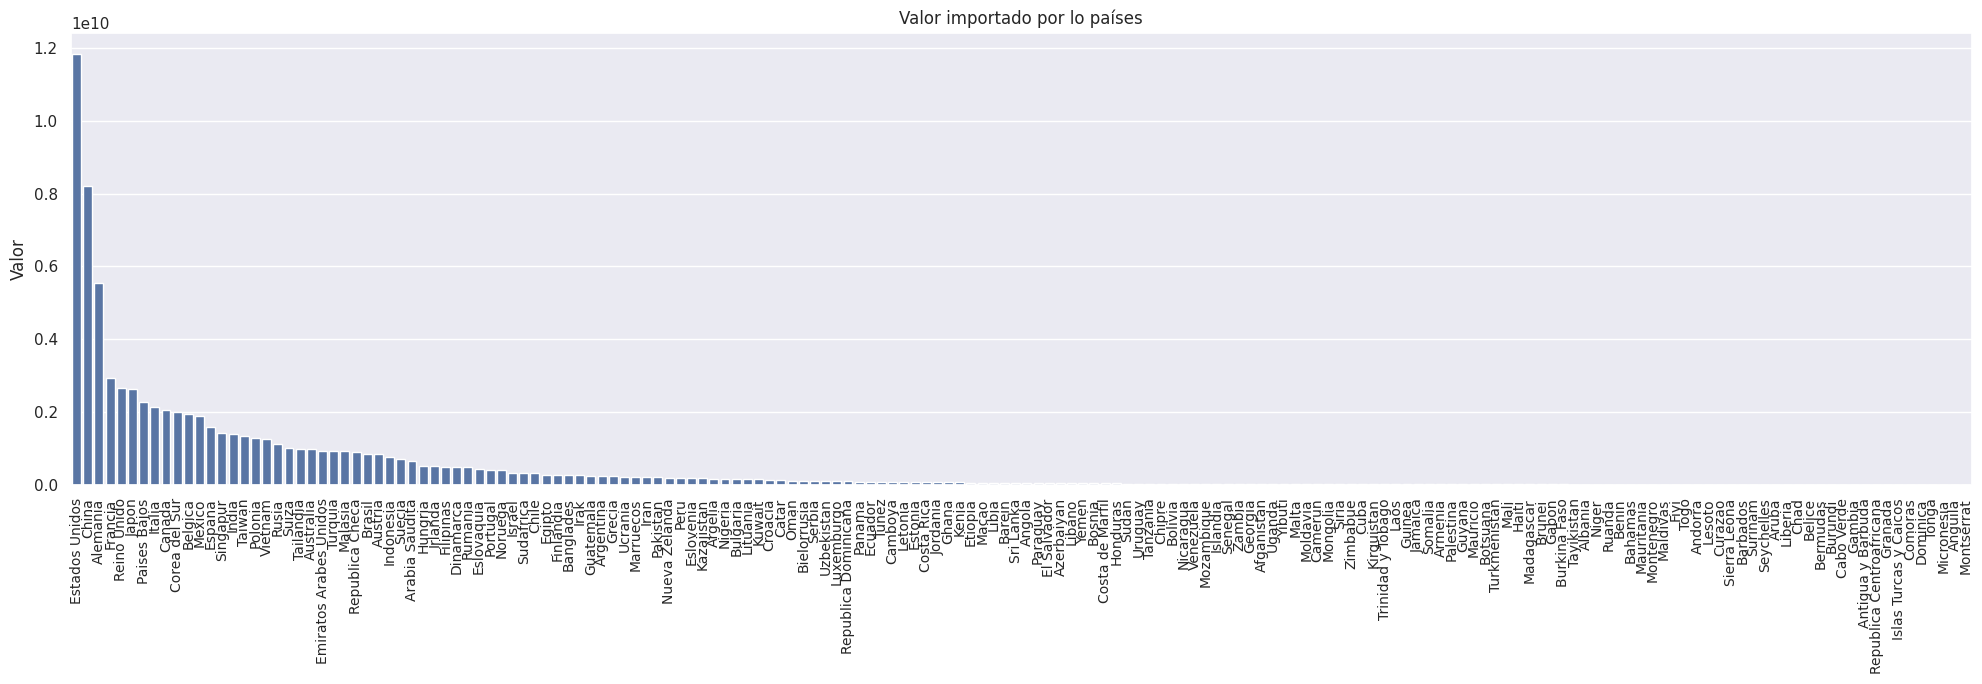

In [ ]:
agr = dft4[['potencial exportación','país']].groupby('país').sum()

agr = agr.sort_values('potencial exportación',ascending=False).reset_index(drop=False)
#agr = agr.reset_index()

#https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize=(20,7))
sns.barplot(x='país', y='potencial exportación', data=agr)
plt.title("Valor importado por lo países")
plt.xlabel('', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Valor")
plt.tight_layout()

### Variables Cualitativas

In [ ]:
dft4=dft4.drop(['país','producto','años'], axis=1)

In [ ]:
categorical_vars = dft4.describe(include=["object","category"]).columns

In [ ]:
print('categorical_vars:',categorical_vars)

categorical_vars: Index(['cadena', 'continent', 'acuerdo', 'elasticidad', 'pib_per', 'ipc',
       'indice_pen', 'rca_a', 'categoria_distancia'],
      dtype='object')


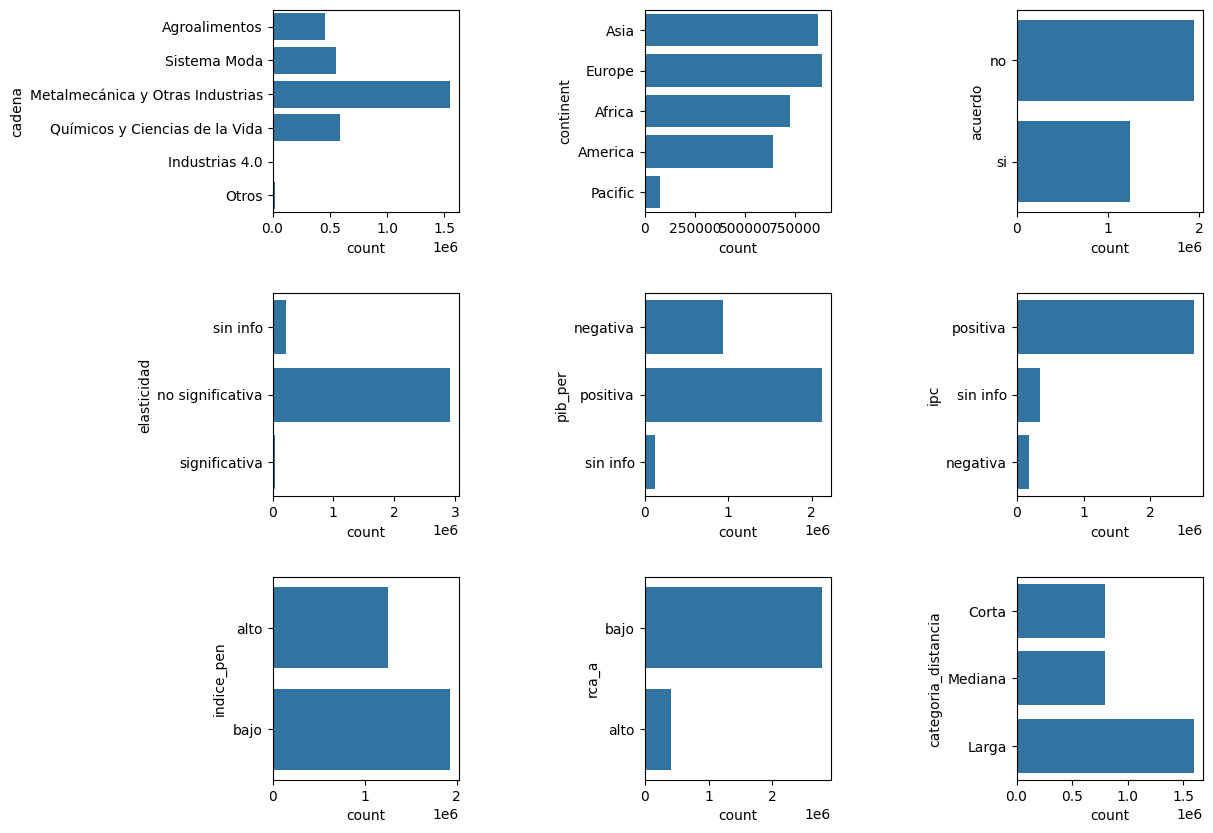

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html

fig, axes = plt.subplots(3,3, figsize=(12,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)

for i, ax in enumerate(axes.ravel()):
    if i >10:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=dft4, ax=ax)

In [ ]:
dft3.describe(include=["object"])

,producto,país,años,cadena,iso3,continent,acuerdo,elasticidad,pib_per,ipc,product_export,pais_export,indice_pen,rca_a,continente_abr,pais_continente
count,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669,3181669
unique,5085,170,5,6,170,5,2,3,3,3,2,2,2,2,5,170
top,330510,Estados Unidos,2022,Metalmecánica y Otras Industrias,USA,Europe,no,no significativa,positiva,positiva,no,si,bajo,bajo,Eur,Estados Unidos (Ame)
freq,848,24049,652288,1547632,24049,880719,1937910,2911373,2119662,2644541,2956403,1812174,1923562,2768461,880719,24049


## **Detección de Outliers**

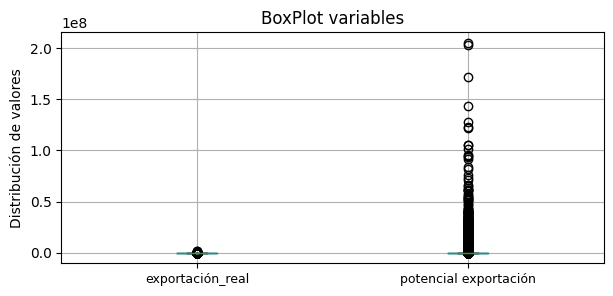

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(7, 3))
dft4.boxplot(fontsize='medium')
plt.title('BoxPlot variables',fontsize=12)
plt.xticks(fontsize=9)
plt.ylabel('Distribución de valores')
plt.show()

## Selección de datos


In [ ]:
# Pivotear la tabla según el año y sumar el valor exportado en una nueva columna llamada 'total'
pivot_table = pd.pivot_table(dft3, values='exportación_real', index=['producto', 'país', 'cadena','elasticidad','pmi','rca_a'], columns='años', aggfunc='sum', fill_value=0)
pivot_table['total'] = pivot_table.sum(axis=1)

# Excluir las filas donde la suma total sea cero
pivot_table = pivot_table[pivot_table['total'] != 0]

In [ ]:
pivot_table = pivot_table.reset_index()

In [ ]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52297 entries, 0 to 52296
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   producto     52297 non-null  int64 
 1   país         52297 non-null  object
 2   cadena       52297 non-null  object
 3   elasticidad  52297 non-null  object
 4   pmi          52297 non-null  object
 5   rca_a        52297 non-null  object
 6   2018         52297 non-null  int64 
 7   2019         52297 non-null  int64 
 8   2020         52297 non-null  int64 
 9   2021         52297 non-null  int64 
 10  2022         52297 non-null  int64 
 11  total        52297 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:
pivot_table

años,producto,país,cadena,elasticidad,pmi,rca_a,2018,2019,2020,2021,2022,total
0,10121,Aruba,Agroalimentos,sin info,alto,bajo,0,4,0,0,0,4
1,10121,Chile,Agroalimentos,sin info,alto,bajo,3,0,6,0,0,9
2,10121,Costa Rica,Agroalimentos,sin info,alto,bajo,16,0,0,9,12,37
3,10121,Curazao,Agroalimentos,sin info,alto,bajo,0,4,0,12,6,22
4,10121,Estados Unidos,Agroalimentos,sin info,alto,bajo,961,297,240,489,289,2276
...,...,...,...,...,...,...,...,...,...,...,...,...
52292,970390,Reino Unido,Otros,sin info,alto,bajo,0,0,0,0,5,5
52293,970390,Singapur,Otros,sin info,alto,bajo,0,0,0,0,2,2
52294,970390,Turquia,Otros,sin info,alto,bajo,0,0,0,0,1,1
52295,970500,Alemania,Otros,no significativa,bajo,bajo,0,0,1,0,0,1


In [ ]:
pivot_table=pivot_table.drop(['total'], axis=1)

In [ ]:
# Crear un DataFrame
dfm = pd.DataFrame(pivot_table)

# No usar paréntesis al acceder al DataFrame
df_melted = dfm.melt(id_vars=['producto', 'país', 'cadena','elasticidad','pmi','rca_a'], var_name='años', value_name='valor')

In [ ]:
# Ordenar por producto, país, cadena y año
df_melted = df_melted.sort_values(by=['producto', 'país', 'cadena','elasticidad','pmi','rca_a', 'años'])


In [ ]:
df_melted.head()

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor
0,10121,Aruba,Agroalimentos,sin info,alto,bajo,2018,0
52297,10121,Aruba,Agroalimentos,sin info,alto,bajo,2019,4
104594,10121,Aruba,Agroalimentos,sin info,alto,bajo,2020,0
156891,10121,Aruba,Agroalimentos,sin info,alto,bajo,2021,0
209188,10121,Aruba,Agroalimentos,sin info,alto,bajo,2022,0


In [ ]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261485 entries, 0 to 261484
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   producto     261485 non-null  int64 
 1   país         261485 non-null  object
 2   cadena       261485 non-null  object
 3   elasticidad  261485 non-null  object
 4   pmi          261485 non-null  object
 5   rca_a        261485 non-null  object
 6   años         261485 non-null  object
 7   valor        261485 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 18.0+ MB


In [ ]:
# Seleccionar las columnas deseadas
df_subset = dft3[['país','años','continent', 'acuerdo', 'pib_per', 'ipc', 'categoria_distancia']]

df_subset = df_subset.drop_duplicates()

In [ ]:
df_subset

,país,años,continent,acuerdo,pib_per,ipc,categoria_distancia
0,Afganistan,2018,Asia,no,negativa,positiva,Larga
1,Afganistan,2019,Asia,no,positiva,positiva,Larga
2,Afganistan,2021,Asia,no,negativa,sin info,Larga
3,Afganistan,2022,Asia,no,sin info,sin info,Larga
9,Afganistan,2020,Asia,no,negativa,sin info,Larga
...,...,...,...,...,...,...,...
3163295,Zimbabue,2021,Africa,no,positiva,positiva,Larga
3163296,Zimbabue,2022,Africa,no,positiva,positiva,Larga
3163297,Zimbabue,2018,Africa,no,positiva,positiva,Larga
3163298,Zimbabue,2019,Africa,no,negativa,positiva,Larga


In [ ]:
#Realizar el merge
df_merge = pd.merge(df_melted, df_subset, on=['país', 'años'], how='inner')

In [ ]:
df_merge

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor,continent,acuerdo,pib_per,ipc,categoria_distancia
0,10121,Aruba,Agroalimentos,sin info,alto,bajo,2018,0,America,no,positiva,positiva,Corta
1,10129,Aruba,Agroalimentos,sin info,bajo,bajo,2018,0,America,no,positiva,positiva,Corta
2,30111,Aruba,Agroalimentos,sin info,alto,alto,2018,0,America,no,positiva,positiva,Corta
3,30211,Aruba,Agroalimentos,no significativa,alto,alto,2018,2,America,no,positiva,positiva,Corta
4,30219,Aruba,Agroalimentos,no significativa,bajo,bajo,2018,0,America,no,positiva,positiva,Corta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261469,843680,Burundi,Metalmecánica y Otras Industrias,no significativa,alto,bajo,2021,14,Africa,no,positiva,positiva,Larga
261470,843880,Burundi,Metalmecánica y Otras Industrias,no significativa,alto,alto,2021,4,Africa,no,positiva,positiva,Larga
261471,843390,Burundi,Metalmecánica y Otras Industrias,no significativa,alto,bajo,2022,0,Africa,no,negativa,positiva,Larga
261472,843680,Burundi,Metalmecánica y Otras Industrias,no significativa,alto,bajo,2022,0,Africa,no,negativa,positiva,Larga


In [ ]:
# Aplicar una transformación logarítmica a la variable "valor"
df_merge['valor_log'] = np.log1p(df_merge['valor'])

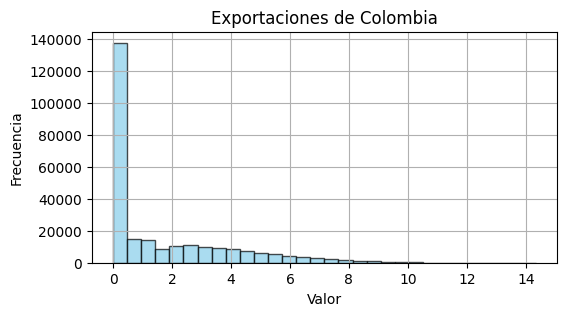

Cuantiles:
0.00     0.000000
0.25     0.000000
0.50     0.000000
0.75     2.833213
1.00    14.335977
Name: valor_log, dtype: float64


In [ ]:
# Graficar la distribución de la variable
plt.figure(figsize=(6, 3))
plt.hist(df_merge['valor_log'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Exportaciones de Colombia')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular los cuantiles
cuantiles = df_merge['valor_log'].quantile([0, 0.25, 0.5, 0.75, 1])

# Imprimir los cuantiles
print("Cuantiles:")
print(cuantiles)

In [ ]:
df_merge['valor'].describe().T

count    2.614740e+05
mean     3.162700e+02
std      7.495334e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+01
max      1.682811e+06
Name: valor, dtype: float64

In [ ]:
df_merge['valor'].sum()

82696380

In [ ]:
país = df_merge.groupby(['país'])['valor'].sum()
país.head(2)

país
Afganistan      59
Albania       2597
Name: valor, dtype: int64

In [ ]:
# Imprimir la suma
print("La suma de la variable numérica es:", país)

La suma de la variable numérica es: país
Afganistan         59
Albania          2597
Alemania      2182297
Andorra            11
Angola          11481
               ...   
Vietnam        125694
Yemen            4686
Yibuti           6700
Zambia           2163
Zimbabue          179
Name: valor, Length: 169, dtype: int64


In [ ]:
suma_por_pais = df_merge.groupby(['país'])['valor'].sum()

# Ordenar la serie resultante en orden ascendente
suma_por_pais_ascendente = suma_por_pais.sort_values(ascending=True)

print(suma_por_pais_ascendente)

país
Uzbekistan              11
Andorra                 11
Lesoto                  13
Chad                    19
Botsuana                20
                    ...   
Mexico             4329251
Brasil             4534461
Peru               4654785
Ecuador            7876505
Estados Unidos    25161954
Name: valor, Length: 169, dtype: int64


In [ ]:
suma_por_pais_ascendente.head(169)

país
Uzbekistan              11
Andorra                 11
Lesoto                  13
Chad                    19
Botsuana                20
                    ...   
Mexico             4329251
Brasil             4534461
Peru               4654785
Ecuador            7876505
Estados Unidos    25161954
Name: valor, Length: 169, dtype: int64

## Análisis de Correlación

La correlación de Spearman es una medida de correlación no paramétrica que evalúa la relación entre las clasificaciones de dos variables en lugar de sus valores exactos. Es más apropiada cuando las variables no tienen una distribución normal o cuando hay valores atípicos presentes. También es adecuada para variables ordinales o discretas.

In [ ]:
dft5=df_merge.drop(['valor'], axis=1)

In [ ]:
dft5['producto']=dft5['producto'].astype('object')

In [ ]:
dft5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261474 entries, 0 to 261473
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   producto             261474 non-null  object  
 1   país                 261474 non-null  object  
 2   cadena               261474 non-null  object  
 3   elasticidad          261474 non-null  object  
 4   pmi                  261474 non-null  object  
 5   rca_a                261474 non-null  object  
 6   años                 261474 non-null  object  
 7   continent            261474 non-null  object  
 8   acuerdo              261474 non-null  object  
 9   pib_per              261474 non-null  object  
 10  ipc                  261474 non-null  object  
 11  categoria_distancia  261474 non-null  category
 12  valor_log            261474 non-null  float64 
dtypes: category(1), float64(1), object(11)
memory usage: 24.2+ MB


In [ ]:
def si_no(dft5, variables):
    dft5 = dft5.copy()
    for columna in variables:
        dft5[columna] = dft5[columna].replace({'si': 1, 'no': 0})
    return dft5

variables = ['acuerdo']

dft5_num1 = si_no(dft5, variables)

# Mapeo de valores para las columnas 'continent', 'cadena', 'ipc', 'pib_per', 'elasticidad', 'pmi', 'rca_a', 'categoria_distancia'
columnas_a_mapear = {
    'continent': {'America': 4, 'Europe': 3, 'Africa': 2, 'Asia': 1, 'Pacific': 0},
    'cadena': {'Agroalimentos': 5, 'Químicos y Ciencias de la Vida': 4, 'Metalmecánica y Otras Industrias': 3, 'Sistema Moda': 2, 'Otros': 1, 'Industrias 4.0': 0},
    'ipc': {'positiva': 2, 'negativa': 1, 'sin info': 0},
    'pib_per': {'positiva': 2, 'negativa': 1, 'sin info': 0},
    'elasticidad': {'significativa': 2, 'no significativa': 1, 'sin info': 0},
    'pmi': {'alto': 1, 'bajo': 0},
    'rca_a': {'alto': 1, 'bajo': 0},
    'categoria_distancia': {'Corta': 2, 'Mediana': 1, 'Larga': 0}
}

for columna, mapeo in columnas_a_mapear.items():
    dft5_num1[columna] = dft5_num1[columna].replace(mapeo)


In [ ]:
dft5_num1['categoria_distancia'].value_counts(dropna=False)

categoria_distancia
2    193129
1     35290
0     33055
Name: count, dtype: int64

In [ ]:
dft5_num1['acuerdo'].value_counts(dropna=False)

acuerdo
1    206329
0     55145
Name: count, dtype: int64

In [ ]:
dft5_num1.head(2)

,producto,país,cadena,elasticidad,pmi,rca_a,años,continent,acuerdo,pib_per,ipc,categoria_distancia,valor_log
0,10121,Aruba,5,0,1,0,2018,4,0,2,2,2,0.0
1,10129,Aruba,5,0,0,0,2018,4,0,2,2,2,0.0


In [ ]:
dft5_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261474 entries, 0 to 261473
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   producto             261474 non-null  object  
 1   país                 261474 non-null  object  
 2   cadena               261474 non-null  int64   
 3   elasticidad          261474 non-null  int64   
 4   pmi                  261474 non-null  int64   
 5   rca_a                261474 non-null  int64   
 6   años                 261474 non-null  object  
 7   continent            261474 non-null  int64   
 8   acuerdo              261474 non-null  int64   
 9   pib_per              261474 non-null  int64   
 10  ipc                  261474 non-null  int64   
 11  categoria_distancia  261474 non-null  category
 12  valor_log            261474 non-null  float64 
dtypes: category(1), float64(1), int64(8), object(3)
memory usage: 24.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

def convertir_num(dft5_num1, categoricas):

    dft5_num1=dft5_num1.copy()
    # Inicializar el codificador de etiquetas
    label_encoder = LabelEncoder()

    # Iterar sobre las columnas categóricas y convertirlas a numéricas
    for columna in categoricas:
        dft5_num1[columna] = label_encoder.fit_transform(dft5_num1[columna])

    return dft5_num1

In [ ]:
categoricas=dft5_num1.select_dtypes(include=['object','category']).columns

In [ ]:
df_numericas = convertir_num(dft5_num1, categoricas)
print(df_numericas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261474 entries, 0 to 261473
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   producto             261474 non-null  int64  
 1   país                 261474 non-null  int64  
 2   cadena               261474 non-null  int64  
 3   elasticidad          261474 non-null  int64  
 4   pmi                  261474 non-null  int64  
 5   rca_a                261474 non-null  int64  
 6   años                 261474 non-null  int64  
 7   continent            261474 non-null  int64  
 8   acuerdo              261474 non-null  int64  
 9   pib_per              261474 non-null  int64  
 10  ipc                  261474 non-null  int64  
 11  categoria_distancia  261474 non-null  int64  
 12  valor_log            261474 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 25.9 MB
None


In [ ]:
#numericas = df1.select_dtypes(include=['int', 'float']).columns
numericas = df_numericas.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Calcular la correlación de Spearman

df_correlations=df_numericas[numericas].corr(method='spearman')

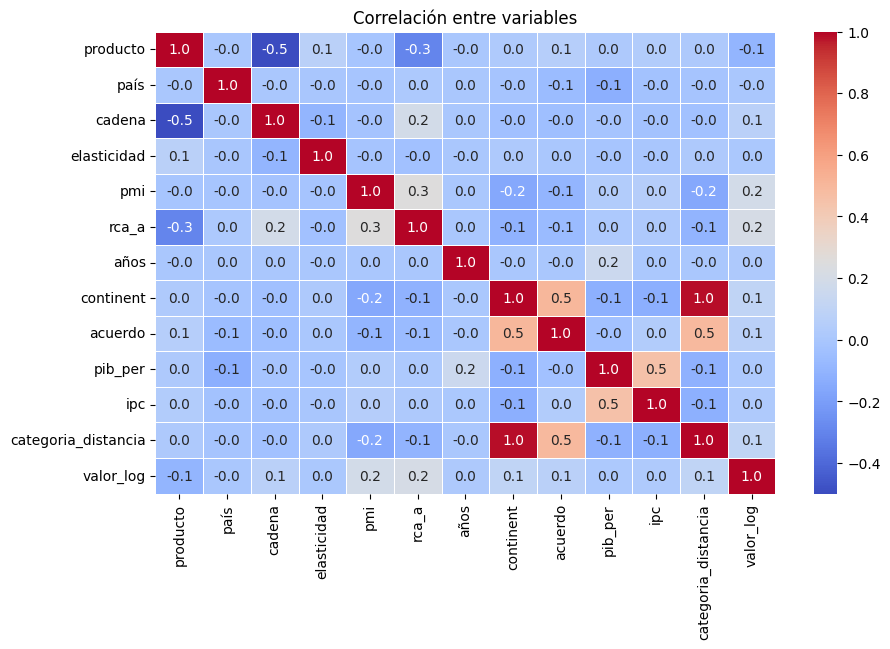

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

hfig, axes = plt.subplots(figsize=(10,6))
sns.heatmap(df_correlations, cmap = 'coolwarm', ax = axes, annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlación entre variables (Coeficiente Spearman)')
plt.show()

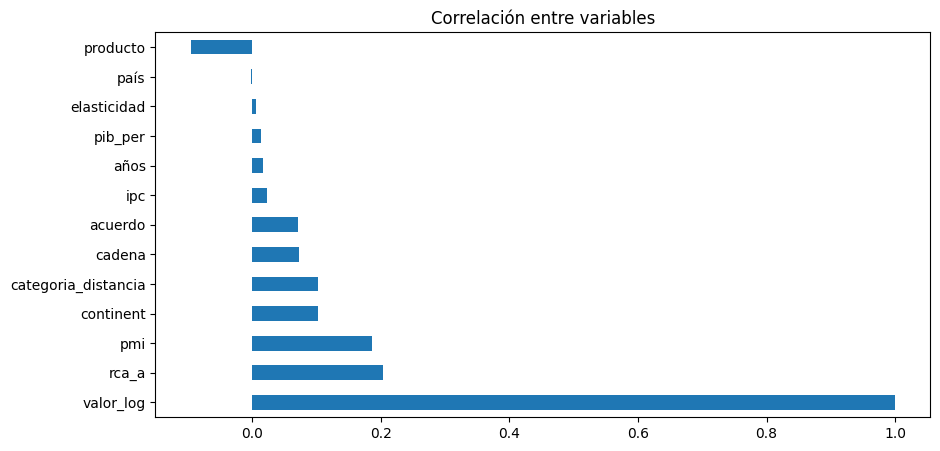

In [ ]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html

(df_correlations
     .valor_log
     .sort_values(ascending=False)
     .plot
     .barh())
plt.title('Correlación entre variables')
plt.show()

In [ ]:
df_numericas.head(2)

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor,continent,acuerdo,pib_per,ipc,categoria_distancia,valor_log
0,0,11,5,0,1,0,0,0,4,0,2,2,2,0.0
1,1,11,5,0,0,0,0,0,4,0,2,2,2,0.0


## Selección de variables

### Factor de Inflación Varianza


Se propone hacer uso del método *VIF (Variance Inflation Factor)* donde el
*VIF* es un número que determina si una variable tiene multicolinealidad o no. Ese número también representa cuánto se infla una variable debido a la dependencia lineal con otras variables. Esto nos ayuda a determinar el conjunto de variables con el que deberíamos trabajar para los modelos no supervisados.

En términos de multicolinealidad, existen variables relacionadas entre sí y para eliminar variables son todas aquellas mayores a 5.

In [ ]:
#Normalización de los datos
#http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#from sklearn.preprocessing import MinMaxScaler
df_numericas_cols =  [col for col in df_numericas.columns]
#scaler = MinMaxScaler()
X_df_numericas = scaler.fit_transform(df_numericas[df_numericas_cols])

In [ ]:
df1= pd.DataFrame(X_df_numericas)
df1.columns = df_numericas_cols
df1.head(2)

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor,continent,acuerdo,pib_per,ipc,categoria_distancia,valor_log
0,-1.850524,-1.433043,1.934809,-3.946345,0.521040,-0.62098,-1.414291,-0.042196,0.510593,-1.934314,0.673565,0.470316,0.553862,-0.713854
1,-1.849666,-1.433043,1.934809,-3.946345,-1.919239,-0.62098,-1.414291,-0.042196,0.510593,-1.934314,0.673565,0.470316,0.553862,-0.713854


In [ ]:
# Calculacion de VIF con el conjunto de datos normalizado con MaxMinScaler     https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(df1,considered_features):

    X = df1[considered_features]
    # the calculation
    X['intercept'] = 1

    # create
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

features_selector_norm = compute_vif(df1, [x for x in df1.columns])
features_selector_norm.sort_values('VIF', ascending=False)

,Variable,VIF
8,continent,10.503383
12,categoria_distancia,9.725783
9,acuerdo,1.662481
0,producto,1.538729
10,pib_per,1.494313
2,cadena,1.473038
11,ipc,1.427074
5,rca_a,1.250730
13,valor_log,1.162057
4,pmi,1.121516


In [ ]:
features_selector_norm = compute_vif(df1, [x for x in df1.columns if x not in ['continent']])
features_selector_norm.sort_values('VIF', ascending=False)

,Variable,VIF
11,categoria_distancia,1.567739
0,producto,1.538510
8,acuerdo,1.521544
9,pib_per,1.491271
2,cadena,1.472791
10,ipc,1.424376
5,rca_a,1.250703
12,valor_log,1.161696
4,pmi,1.121461
1,país,1.071733


### PCA


Con el fin de observar como están relacionadas las variables también se puede evaluar una representación en Análisis de componentes principales (PCA) para las variables.

In [ ]:
dfta=df_numericas.drop(['producto', 'país','valor'], axis=1)

In [ ]:
dftc=dfta.corr()

In [ ]:
names =  dftc.index
names

Index(['cadena', 'elasticidad', 'pmi', 'rca_a', 'años', 'continent', 'acuerdo',
       'pib_per', 'ipc', 'categoria_distancia', 'valor_log'],
      dtype='object')

Componentes lineales:
 [[-0.14304316  0.03199301 -0.29356883 -0.28313675 -0.05420985  0.49014598
   0.45459764 -0.25066876 -0.23080377  0.48863417 -0.086352  ]
 [-0.32276297  0.15537905 -0.22117799 -0.41150789  0.16126137 -0.04060508
   0.02382912  0.48777439  0.46011766 -0.04558262 -0.41652281]]

Ratio de variabilidad:  [0.35683433 0.19673133] 



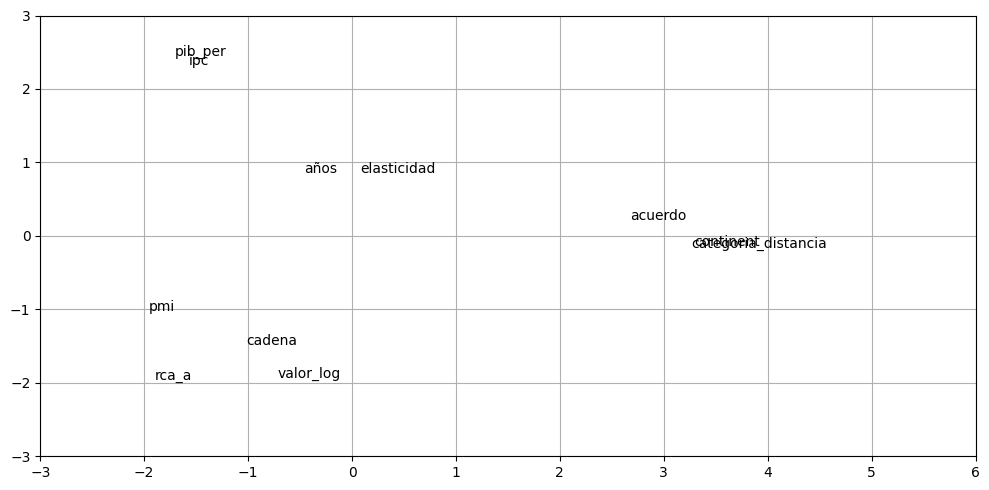

In [ ]:
# Normalizació de los datos
#http://scikit-learn.org/stable/modules/preprocessing.html

#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#features_norm1 = min_max_scaler.fit_transform(dftc)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_norm1 = scaler.fit_transform(dftc)

# Análisis de Componentes Principales
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm1)
print("Componentes lineales:\n", estimator.components_)
print("\nRatio de variabilidad: ", estimator.explained_variance_ratio_, "\n")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

plt.xlim(-3, 6)
plt.ylim(-3, 3)
ax.grid(True)
fig.tight_layout()
plt.show()

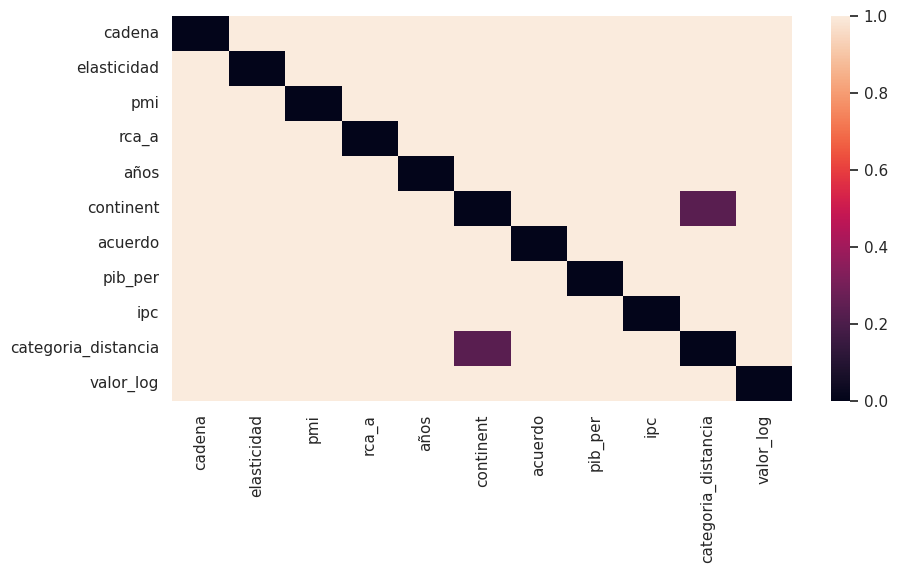

In [ ]:
# matriz de similitud
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.metrics
dist1 = sklearn.metrics.DistanceMetric.get_metric('euclidean')
matdist1= dist1.pairwise(features_norm1)

#  Visualización
import seaborn as sns; sns.set()
ax = sns.heatmap(matdist1,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

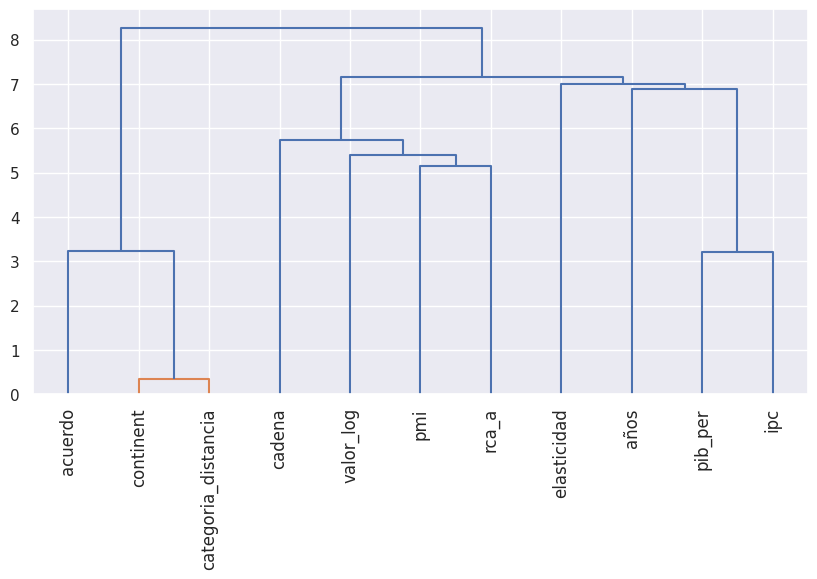

In [ ]:
#  Dendrograma
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters1 = cluster.hierarchy.linkage(matdist1, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters1, color_threshold = 1
                             , labels = names , leaf_rotation=90)
plt.show()

In [ ]:
dftc

,cadena,elasticidad,pmi,rca_a,años,continent,acuerdo,pib_per,ipc,categoria_distancia,valor_log
cadena,1.000000,-0.105483,-0.022421,0.202791,0.000011,-0.051070,-0.058488,-0.018291,-0.034093,-0.047588,0.119478
elasticidad,-0.105483,1.000000,-0.018854,-0.034084,-0.000013,0.011744,0.001380,-0.006613,-0.004354,0.015439,-0.009248
pmi,-0.022421,-0.018854,1.000000,0.250461,0.000014,-0.145236,-0.100211,0.041574,0.040018,-0.153586,0.183831
rca_a,0.202791,-0.034084,0.250461,1.000000,0.000034,-0.101713,-0.068554,0.016516,0.018146,-0.108088,0.275087
años,0.000011,-0.000013,0.000014,0.000034,1.000000,-0.000139,-0.000106,0.130691,-0.018898,-0.000126,0.020921
continent,-0.051070,0.011744,-0.145236,-0.101713,-0.000139,1.000000,0.610759,-0.096104,-0.113404,0.946126,0.085856
acuerdo,-0.058488,0.001380,-0.100211,-0.068554,-0.000106,0.610759,1.000000,-0.043579,0.043869,0.566298,0.077600
pib_per,-0.018291,-0.006613,0.041574,0.016516,0.130691,-0.096104,-0.043579,1.000000,0.512876,-0.103416,0.017595
ipc,-0.034093,-0.004354,0.040018,0.018146,-0.018898,-0.113404,0.043869,0.512876,1.000000,-0.123313,0.036477
categoria_distancia,-0.047588,0.015439,-0.153586,-0.108088,-0.000126,0.946126,0.566298,-0.103416,-0.123313,1.000000,0.093267


In [ ]:
cut = 1 # !!!! ad-hoc
labels1 = cluster.hierarchy.fcluster(clusters1, cut , criterion = 'distance')

labels1

array([ 6, 10,  3,  4,  9,  1,  2,  7,  8,  1,  5], dtype=int32)

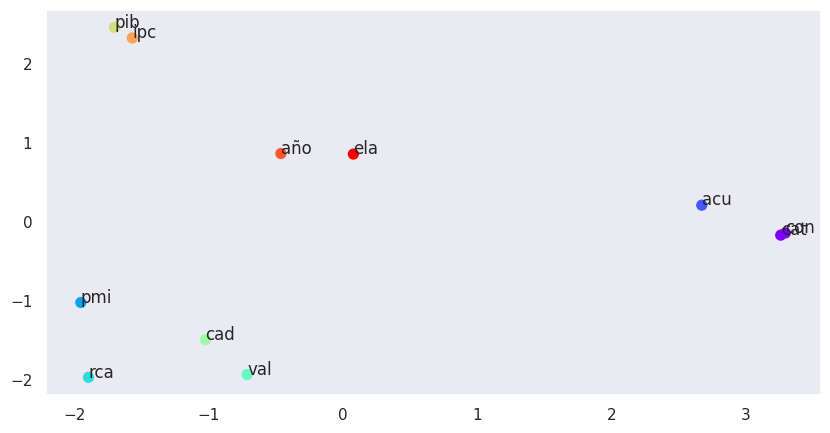

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels1,s=50, cmap="rainbow")
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3])

plt.grid()
plt.show()

## Modelamiento

In [ ]:
df_numericas

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor,continent,acuerdo,pib_per,ipc,categoria_distancia,valor_log
0,0,11,5,0,1,0,0,0,4,0,2,2,2,0.000000
1,1,11,5,0,0,0,0,0,4,0,2,2,2,0.000000
2,32,11,5,0,1,1,0,0,4,0,2,2,2,0.000000
3,34,11,5,1,1,1,0,2,4,0,2,2,2,1.098612
4,36,11,5,1,0,0,0,0,4,0,2,2,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261469,3146,31,3,1,1,0,3,14,2,0,2,2,0,2.708050
261470,3158,31,3,1,1,1,3,4,2,0,2,2,0,1.609438
261471,3137,31,3,1,1,0,4,0,2,0,1,2,0,0.000000
261472,3146,31,3,1,1,0,4,0,2,0,1,2,0,0.000000


In [ ]:
dftb=df_numericas.drop(['valor',"continent"], axis=1)

In [ ]:
dftb = dftb[dftb['valor_log'] >0]

In [ ]:
dftb = dftb.loc[dftb['años'] == 4]

In [ ]:
dftb

,producto,país,cadena,elasticidad,pmi,rca_a,años,acuerdo,pib_per,ipc,categoria_distancia,valor_log
4032,36,11,5,1,0,0,4,0,2,0,2,0.693147
4034,53,11,5,0,0,0,4,0,2,0,2,1.386294
4037,73,11,5,1,1,1,4,0,2,0,2,1.386294
4040,85,11,5,1,1,0,4,0,2,0,2,4.143135
4043,88,11,5,0,0,0,4,0,2,0,2,3.912023
...,...,...,...,...,...,...,...,...,...,...,...,...
261094,3719,22,3,0,0,0,4,0,2,0,2,4.859812
261098,4032,22,3,1,1,1,4,0,2,0,2,3.583519
261242,2710,28,3,1,1,0,4,0,1,2,0,1.791759
261393,3159,91,3,1,1,1,4,0,2,2,0,2.079442


### K-means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


scaler = StandardScaler()
scaled_data = scaler.fit_transform(dftb)

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
pca_data = pca.fit_transform(scaled_data)

In [ ]:
print("Componentes lineales:\n", pca.components_)
print("\nRatio de variabilidad: ", pca.explained_variance_ratio_, "\n")

Componentes lineales:
 [[-5.03304679e-01  4.34306927e-02  4.77420512e-01 -6.89712370e-02
   1.87034235e-01  4.76510972e-01 -4.33680869e-19 -2.51148009e-01
  -7.27611734e-02 -8.58486421e-02 -2.64440994e-01  3.23106403e-01]
 [-1.09191620e-02  4.22801702e-01  8.72048344e-03  9.52375251e-03
  -1.27099741e-01 -1.01821708e-01  2.22044605e-16 -4.49998583e-02
  -6.69501978e-01 -5.65452102e-01  1.23443611e-01 -9.59085398e-02]]

Ratio de variabilidad:  [0.19415042 0.16141158] 



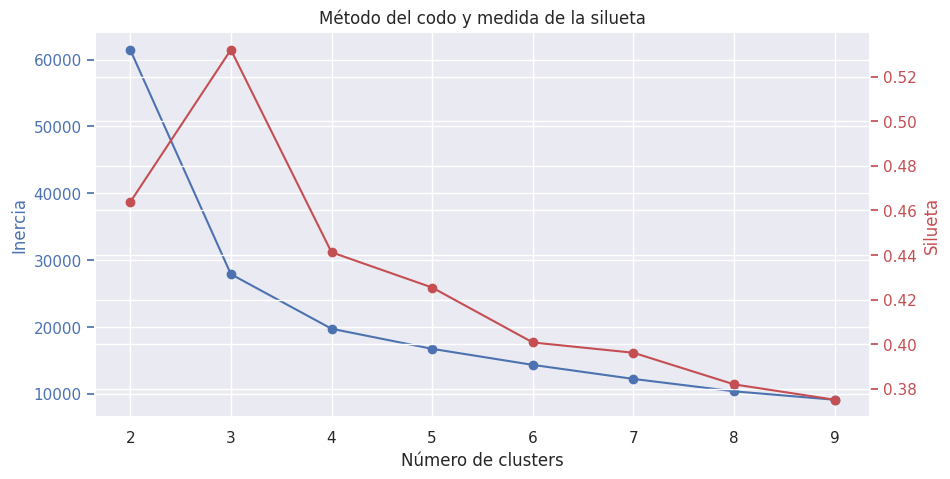

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inicializa las listas para almacenar los valores de la inercia y la silueta
inertia = []
silhouette = []

# Calcula la inercia y la silueta para diferentes números de clusters
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(pca_data)

    # Calcula la inercia
    inertia.append(kmeans.inertia_)

    # Calcula la silueta
    silhouette.append(silhouette_score(pca_data, kmeans.labels_))

# Grafica la curva de codo y la medida de la silueta
fig, ax1 = plt.subplots()

# Curva de codo
ax1.plot(range(2, 10), inertia, marker='o', label='Inercia', color='b')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Inercia', color='b')
ax1.tick_params('y', colors='b')

# Segunda gráfica para la silueta
ax2 = ax1.twinx()
ax2.plot(range(2, 10), silhouette, marker='o', label='Silueta', color='r')
ax2.set_ylabel('Silueta', color='r')
ax2.tick_params('y', colors='r')

plt.title('Método del codo y medida de la silueta')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Basado en la curva de codo, selecciona el número óptimo de clusters
n_clusters = 3

# Aplica K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(pca_data)
clusters = kmeans.predict(pca_data)

#Interpreta los clusters
# Añade los clusters al DataFrame original
dftb['cluster'] = clusters

Cluster 1 - Centroide: [ 1.74755606 -0.41537686]
Cluster 2 - Centroide: [-0.88181671 -0.22689557]
Cluster 3 - Centroide: [0.53143701 4.76367997]


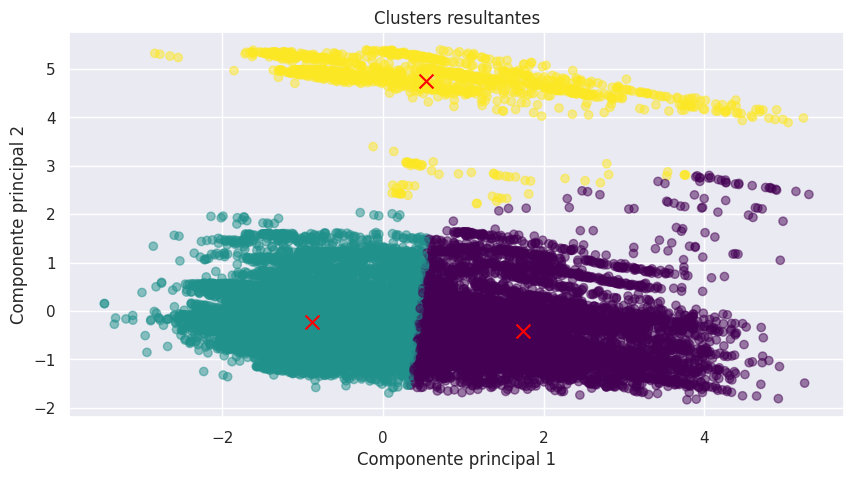

In [ ]:
# Analiza los clusters resultantes
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i+1} - Centroide: {center}')

# Visualiza los clusters en el espacio reducido por PCA
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=100)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clusters resultantes')
plt.show()

### Validación


In [ ]:
# generar los grupos
labels = kmeans.labels_

In [ ]:
# organizar el dataframe original
dftk=dft5.drop(['ipc','valor_log','categoria_distancia',"continent"], axis=1)

dftk = dftk[dftk['valor'] >0]

dftk = dftk.loc[dftk['años'] =='2022']

# Añadir las etiquetas al DataFrame original
dftk['cluster'] = labels

In [ ]:
# validar los datos
dftk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25608 entries, 4032 to 261458
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   producto     25608 non-null  object
 1   país         25608 non-null  object
 2   cadena       25608 non-null  object
 3   elasticidad  25608 non-null  object
 4   pmi          25608 non-null  object
 5   rca_a        25608 non-null  object
 6   años         25608 non-null  object
 7   valor        25608 non-null  int64 
 8   acuerdo      25608 non-null  object
 9   pib_per      25608 non-null  object
 10  cluster      25608 non-null  int32 
dtypes: int32(1), int64(1), object(9)
memory usage: 2.2+ MB


In [ ]:
dftk.head(5)

,producto,país,cadena,elasticidad,pmi,rca_a,años,valor,acuerdo,pib_per,cluster
4032,30219,Aruba,Agroalimentos,no significativa,bajo,bajo,2022,1,no,positiva,0
4034,30369,Aruba,Agroalimentos,sin info,bajo,bajo,2022,3,no,positiva,0
4037,30611,Aruba,Agroalimentos,no significativa,alto,alto,2022,3,no,positiva,0
4040,40110,Aruba,Agroalimentos,no significativa,alto,bajo,2022,62,no,positiva,0
4043,40150,Aruba,Agroalimentos,sin info,bajo,bajo,2022,49,no,positiva,0


In [ ]:
# agrupar por el número de clúster
cluster_grouped = dftk.groupby('cluster')

# diccionario para almacenar los 10 primeros países por cluster
top_countries_by_cluster = {}

# Iterar sobre cada grupo de clúster
for cluster, group in cluster_grouped:
    # Ordenar el grupo por valor de exportación en orden descendente
    sorted_group = group.sort_values(by='valor', ascending=False)
    # Tomar los primeros 10 países de cada clúster
    top_countries = sorted_group.head(20)
    # Almacenar los resultados en el diccionario
    top_countries_by_cluster[cluster] = top_countries

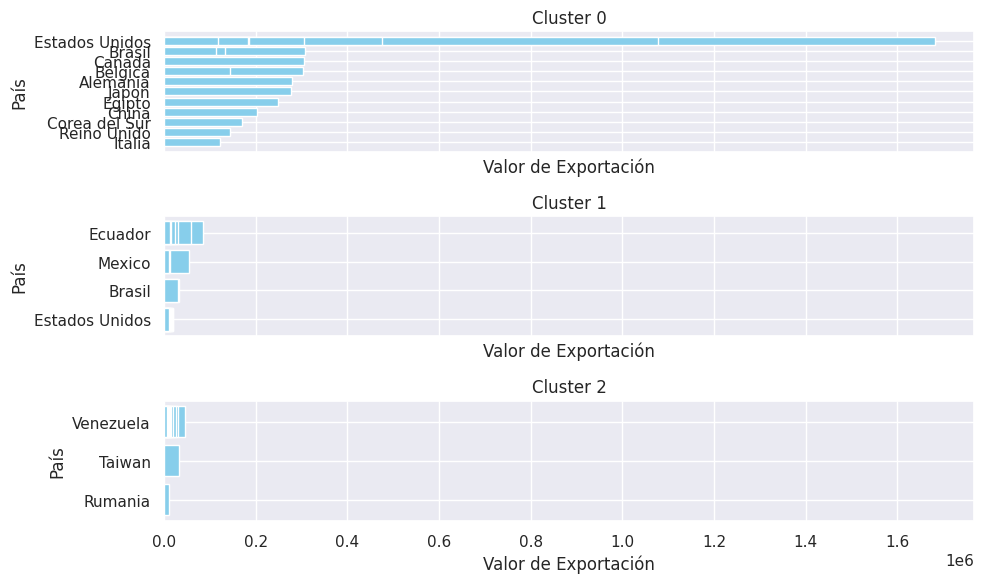

In [ ]:

# figura y ejes para la gráfica
fig, axs = plt.subplots(len(top_countries_by_cluster), figsize=(10, 6), sharex=True)

# graficar los 10 primeros países por cada cluster
for i, (cluster, top_countries) in enumerate(top_countries_by_cluster.items()):
    axs[i].barh(top_countries['país'], top_countries['valor'], color='skyblue')
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].set_xlabel('Valor de Exportación')
    axs[i].set_ylabel('País')
    axs[i].invert_yaxis()

# diseño de la gráfica
plt.tight_layout()

# gráfica
plt.show()


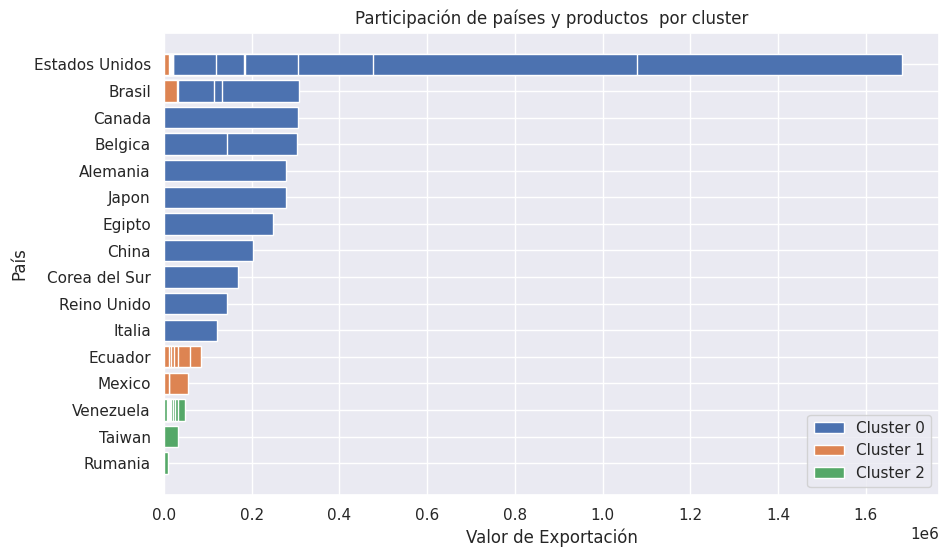

In [ ]:

# figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# graficar los países en orden descendente de participación sobre cada cluster
for cluster, top_countries in top_countries_by_cluster.items():
    ax.barh(top_countries['país'], top_countries['valor'], label=f'Cluster {cluster}')

# Configurar etiquetas y leyenda
ax.set_xlabel('Valor de Exportación')
ax.set_ylabel('País')
ax.set_title('Participación de países y productos  por cluster')
ax.legend()

# Invertir el eje y para que el país con el valor más alto esté en la parte superior
ax.invert_yaxis()

# Mostrar la gráfica
plt.show()


In [ ]:
## Agrupar por clúster y país, y calcular la suma del valor exportado
grouped_df = dftk.groupby(['cluster', 'país'])['valor'].sum().reset_index()

# Ordenar los países dentro de cada clúster por valor exportado de manera descendente
grouped_df['rank'] = grouped_df.groupby('cluster')['valor'].rank(ascending=False, method='dense')

# Seleccionar los primeros 10 países por clúster
top_countries_by_cluster = grouped_df[grouped_df['rank'] <= 20]


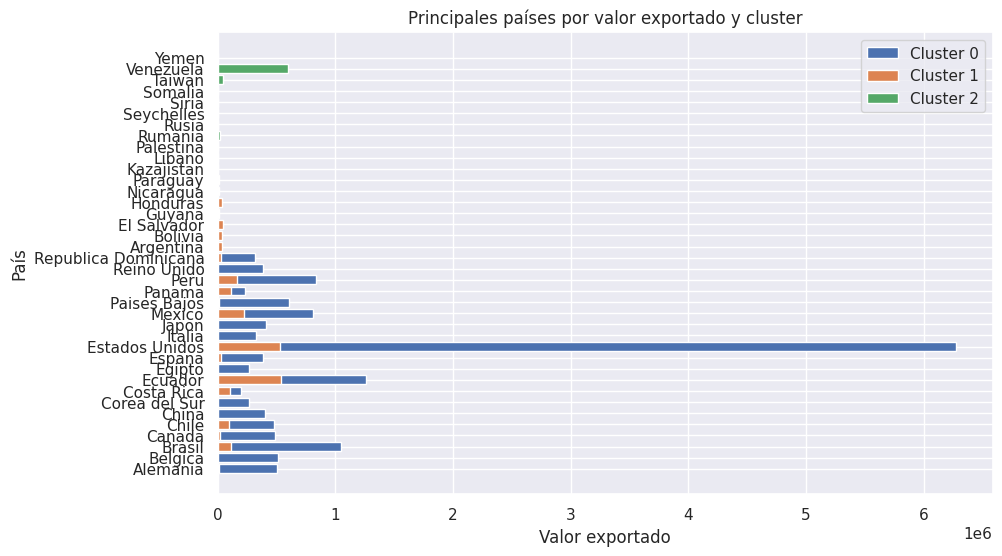

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar sobre cada clúster
for cluster, data in top_countries_by_cluster.groupby('cluster'):
    # Obtener los datos relevantes
    countries = data['país']
    values = data['valor']

    # Graficar los valores
    ax.barh(countries, values, label=f'Cluster {cluster}')

# Ajustar la apariencia de la gráfica
ax.set_xlabel('Valor exportado')
ax.set_ylabel('País')
ax.set_title('Principales países por valor exportado y cluster')
ax.legend()

# Mostrar la gráfica
plt.show()


## Visualización de resultados

In [ ]:
dftk1=dftk.copy()

In [ ]:
# Función para convertir valores numéricos a categorías

def convertir_a_categorica(valor):
    if valor >= 2:
        return "bajo"
    elif valor == 1:
        return "medio"
    else:
        return "alto"

# Aplicar la función a la columna 'cluster'
dftk1['cluster_categorico'] = dftk1['cluster'].apply(lambda x: convertir_a_categorica(x))


In [ ]:
categorical_vars = dftk1.describe(include=["object","category"]).columns
continuous_vars = dftk1.describe().columns

In [ ]:
print('continuous_vars:',continuous_vars)
print('categorical_vars:',categorical_vars)

continuous_vars: Index(['valor', 'cluster'], dtype='object')
categorical_vars: Index(['producto', 'país', 'cadena', 'elasticidad', 'pmi', 'rca_a', 'años',
       'acuerdo', 'pib_per', 'cluster_categorico'],
      dtype='object')


In [ ]:
dftk1[continuous_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
valor,25608.0,822.045142,14461.910221,1.0,4.0,22.0,126.0,1682811.0
cluster,25608.0,0.752343,0.547981,0.0,0.0,1.0,1.0,2.0


<Figure size 600x300 with 0 Axes>

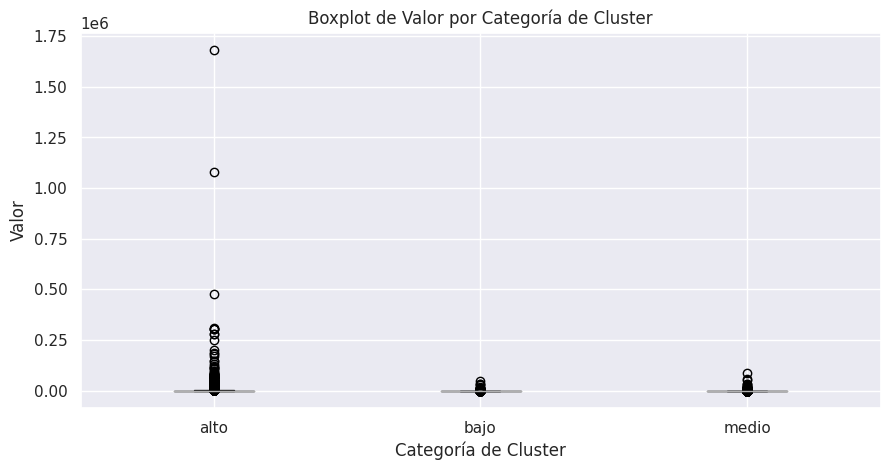

In [ ]:
# Crear la figura de matplotlib
plt.figure(figsize=(6, 3))

# Graficar el boxplot
dftk1.boxplot(column='valor', by='cluster_categorico')
plt.title('Boxplot de Valor por Categoría de Cluster')
plt.xlabel('Categoría de Cluster')
plt.ylabel('Valor')
plt.suptitle('')
plt.show()

In [ ]:
dftk1=dftk1.drop(['años','cluster_categorico','producto', 'país'], axis=1)

In [ ]:
categorical_vars = dftk1.describe(include=["object","category"]).columns

In [ ]:
print('categorical_vars:',categorical_vars)

categorical_vars: Index(['cadena', 'elasticidad', 'pmi', 'rca_a', 'acuerdo', 'pib_per'], dtype='object')


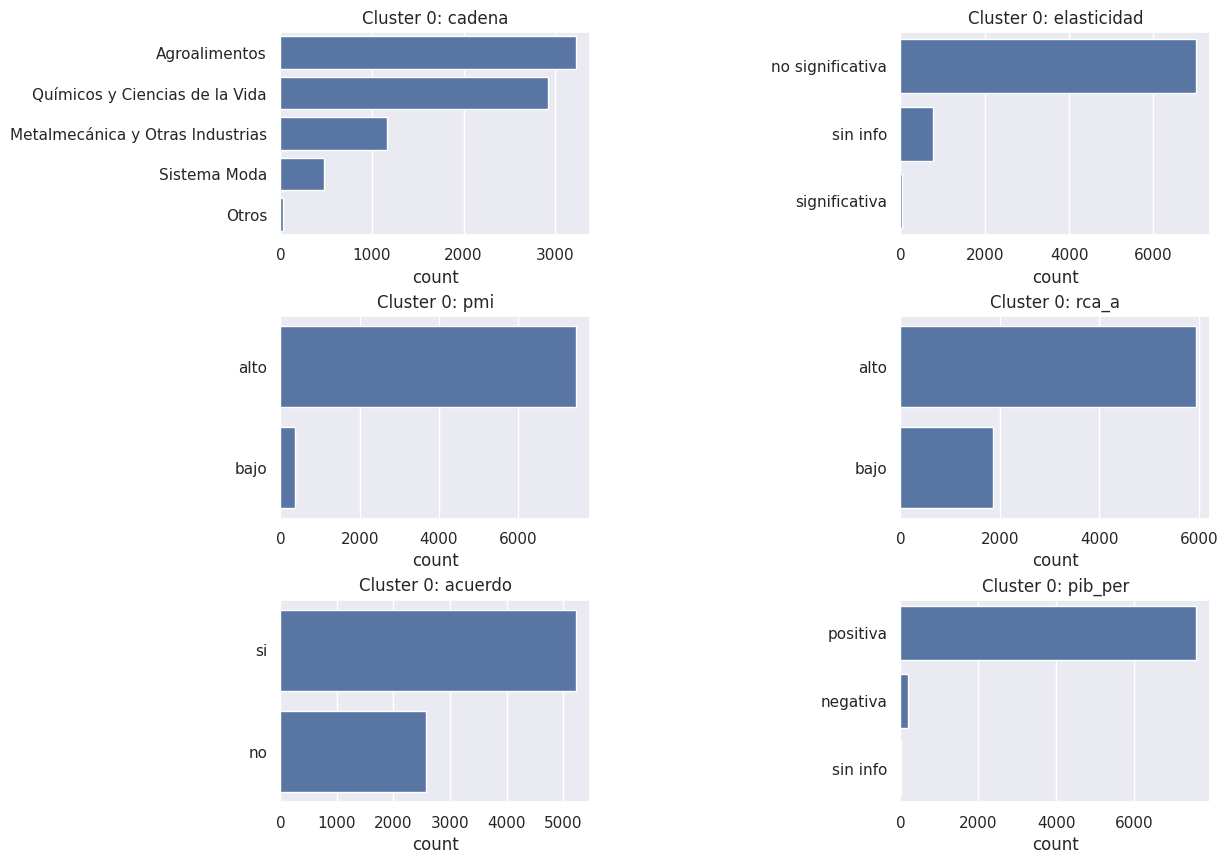

In [ ]:
import seaborn as sns

# Supongamos que tienes una lista llamada categorical_vars que contiene las variables categóricas
categorical_vars = ['cadena', 'elasticidad', 'pmi', 'rca_a', 'acuerdo', 'pib_per']

# Crear una figura con subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)

# Iterar sobre los subgráficos
for i, ax in enumerate(axes.ravel()):
    if i >= len(categorical_vars):
        ax.set_visible(False)
        continue

    # Obtener la variable categórica actual
    current_var = categorical_vars[i]

    # Obtener el orden de las categorías basado en la frecuencia en el cluster 1
    ordered_categories = dftk1[dftk1['cluster'] == 0][current_var].value_counts().index

    # Graficar el countplot ordenando las categorías
    sns.countplot(y=current_var, data=dftk1[dftk1['cluster'] == 0], ax=ax, order=ordered_categories)
    ax.set_title(f'Cluster 0: {current_var}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y para mayor claridad

plt.show()

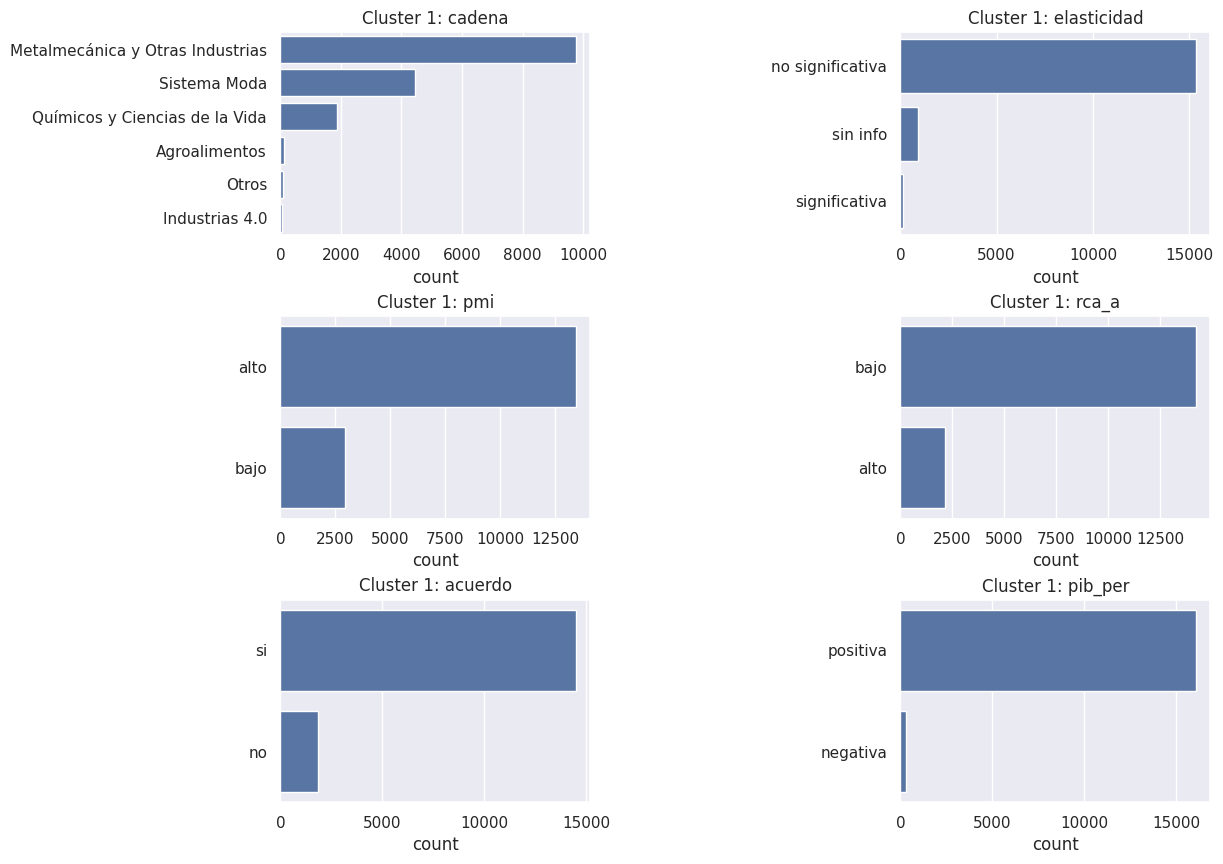

In [ ]:
import seaborn as sns

# Supongamos que tienes una lista llamada categorical_vars que contiene las variables categóricas
categorical_vars = ['cadena', 'elasticidad', 'pmi', 'rca_a', 'acuerdo', 'pib_per']

# Crear una figura con subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)

# Iterar sobre los subgráficos
for i, ax in enumerate(axes.ravel()):
    if i >= len(categorical_vars):
        ax.set_visible(False)
        continue

    # Obtener la variable categórica actual
    current_var = categorical_vars[i]

    # Obtener el orden de las categorías basado en la frecuencia en el cluster 1
    ordered_categories = dftk1[dftk1['cluster'] == 1][current_var].value_counts().index

    # Graficar el countplot ordenando las categorías
    sns.countplot(y=current_var, data=dftk1[dftk1['cluster'] == 1], ax=ax, order=ordered_categories)
    ax.set_title(f'Cluster 1: {current_var}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y para mayor claridad

plt.show()



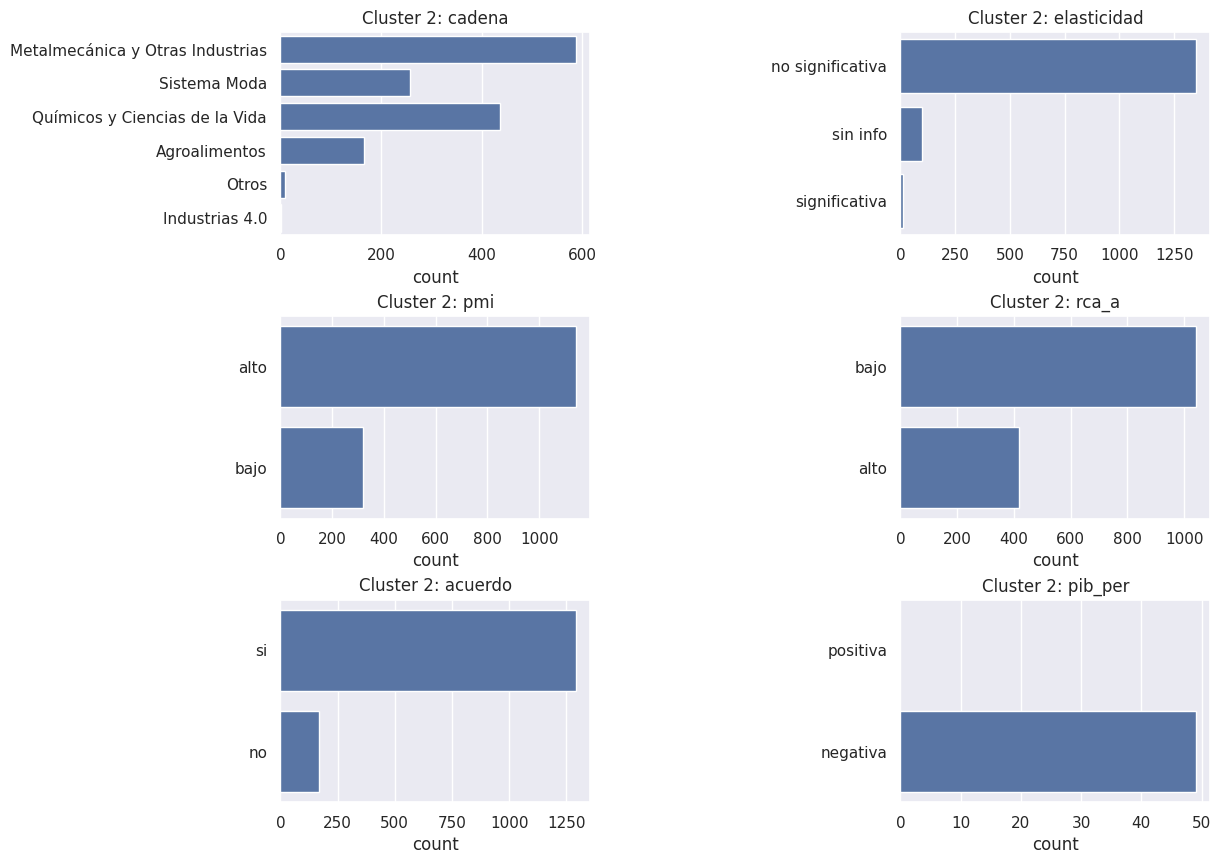

In [ ]:
import seaborn as sns

# Supongamos que tienes una lista llamada categorical_vars que contiene las variables categóricas
categorical_vars = ['cadena', 'elasticidad', 'pmi', 'rca_a', 'acuerdo', 'pib_per']

# Crear una figura con subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)

# Iterar sobre los subgráficos
for i, ax in enumerate(axes.ravel()):
    if i >= len(categorical_vars):
        ax.set_visible(False)
        continue

    # Obtener la variable categórica actual
    current_var = categorical_vars[i]

    # Obtener el orden de las categorías basado en la frecuencia en el cluster 1
    ordered_categories = dftk1[dftk1['cluster'] == 1][current_var].value_counts().index

    # Graficar el countplot ordenando las categorías
    sns.countplot(y=current_var, data=dftk1[dftk1['cluster'] == 2], ax=ax, order=ordered_categories)
    ax.set_title(f'Cluster 2: {current_var}')
    ax.set_ylabel('')  # Eliminar la etiqueta del eje y para mayor claridad

plt.show()

## Referencias


* [Machine learning con Python y Scikit-learn
](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html)

* [*Python* 3: documentación oficial.](https://docs.python.org/3/)

* [Documento oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) y [Guía de usuario de *Pandas*](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org)

* [scikit-learn](https://scikit-learn.org/stable/index.html)

* [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)